# Stroke Prediction - Binary Classification of Strokes Given Patient Characteristics

<hr style="border:2px solid gray">

## 1. Initial data exploration and visualizations

In [1]:
import numpy as np
import pandas as pd
import mltools as ml

df1 = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
df2 = pd.read_csv("data/train.csv")
df = pd.concat([df1, df2])
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


### Visualizing distribution of features

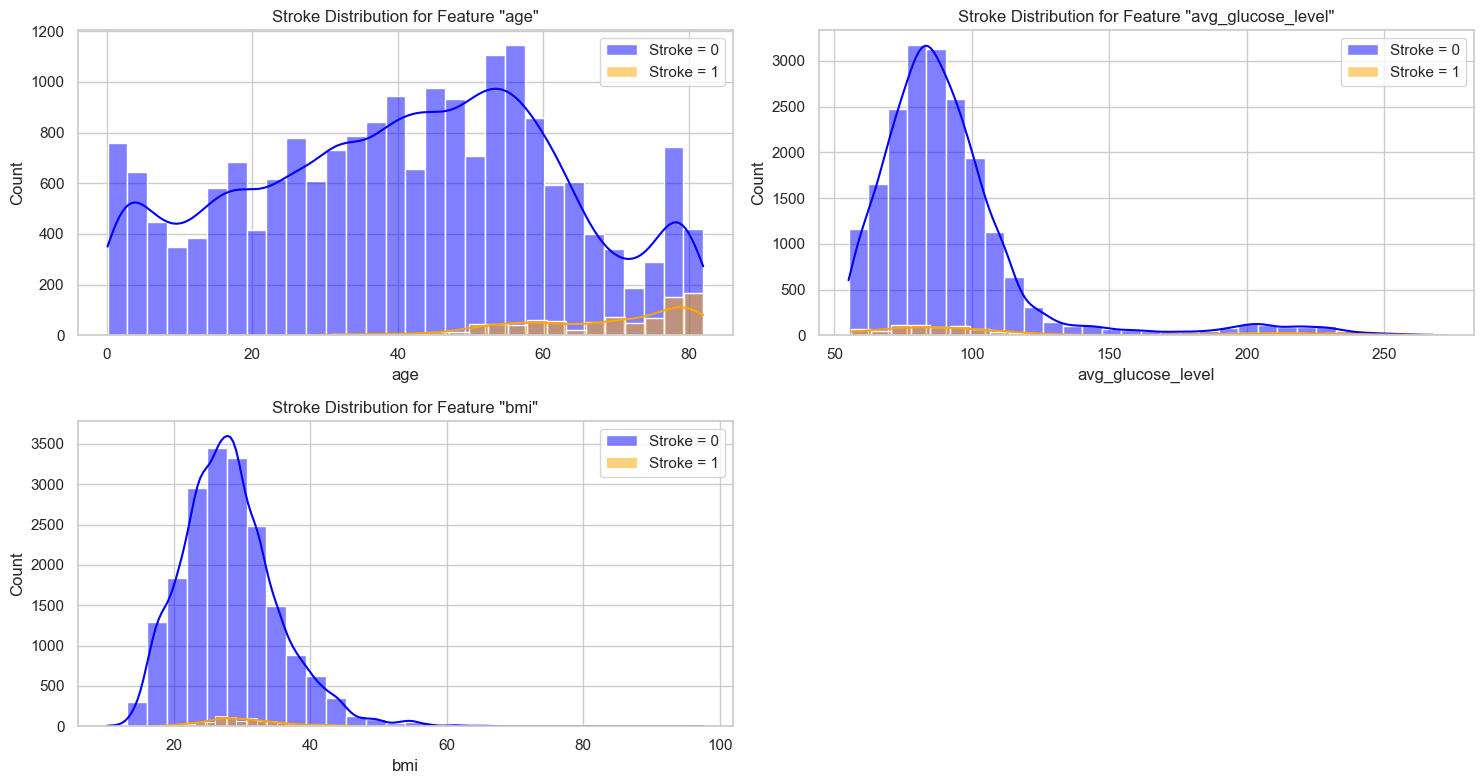

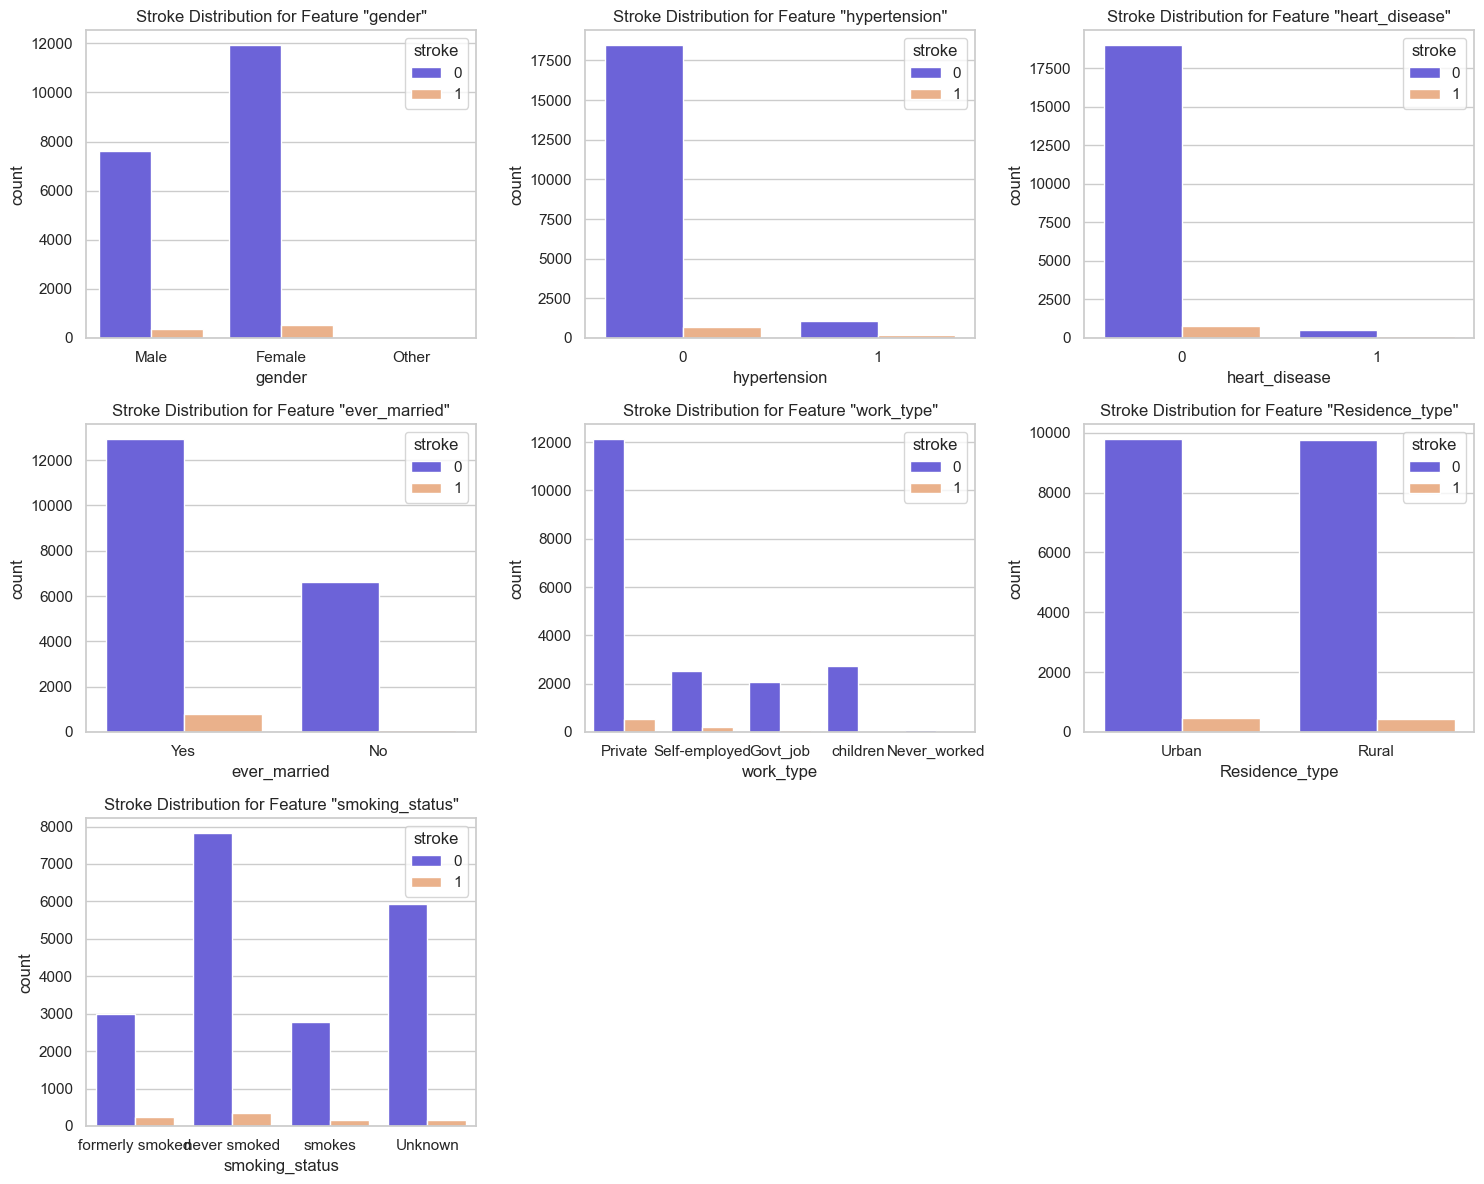

In [2]:
# Numerical features - histogram

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numerical_features = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 8))

# Plot histograms for numerical features with different colors for stroke=0 and stroke=1
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[df['stroke'] == 0][feature], bins=30, kde=True, color='blue', label='Stroke = 0')
    sns.histplot(df[df['stroke'] == 1][feature], bins=30, kde=True, color='orange', label='Stroke = 1')
    plt.title(f'Stroke Distribution for Feature "{feature}"')
    plt.legend()

plt.tight_layout()
plt.show()


# Categorical features - bar chart

sns.set(style="whitegrid")

categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15, 12))

# Plot count plots for categorical features with different colors for stroke=0 and stroke=1
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=df, hue='stroke', palette=['#5B4FEC',"#FAAE7B"])
    plt.title(f'Stroke Distribution for Feature "{feature}"')

plt.tight_layout()
plt.show()

### Visualizing distribution of features given the patient had stroke=1

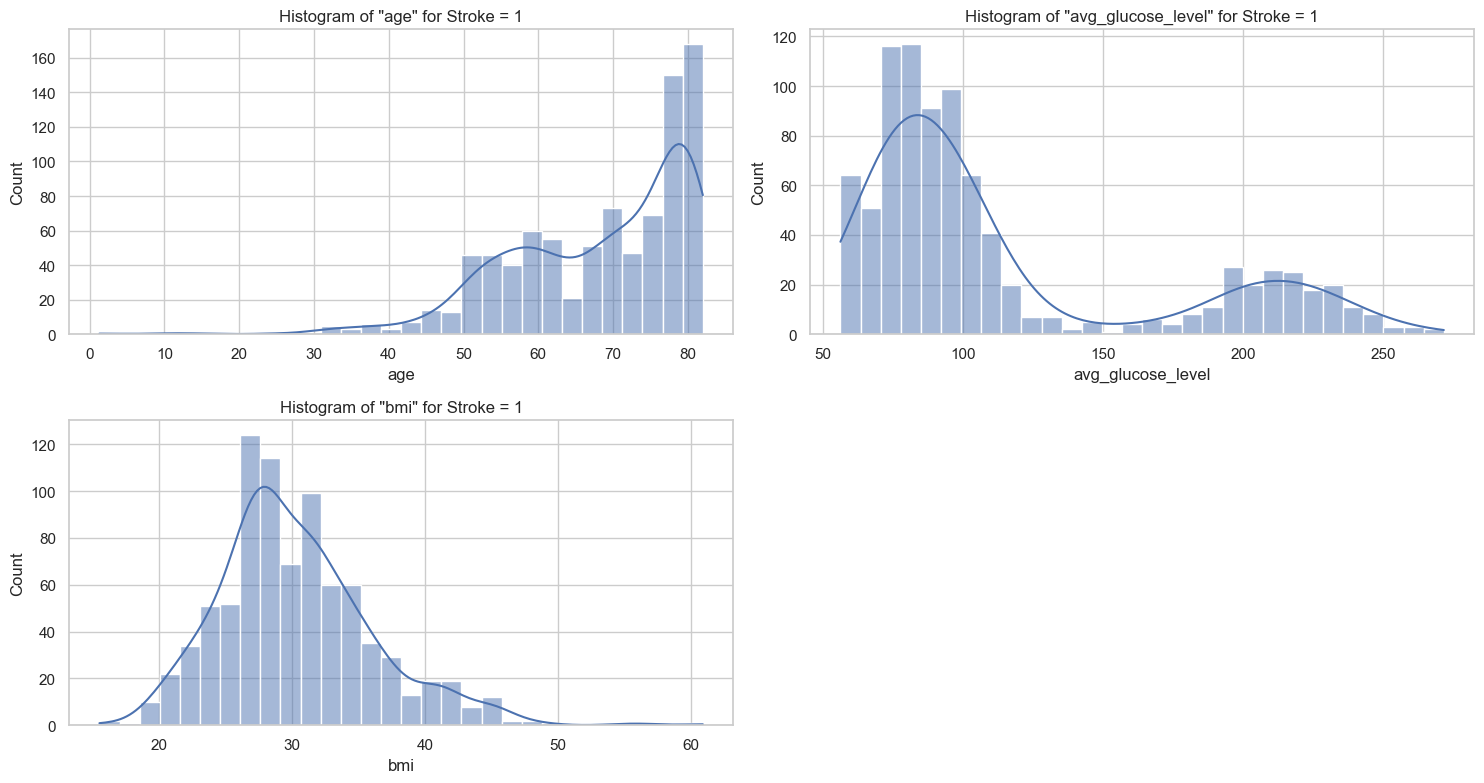

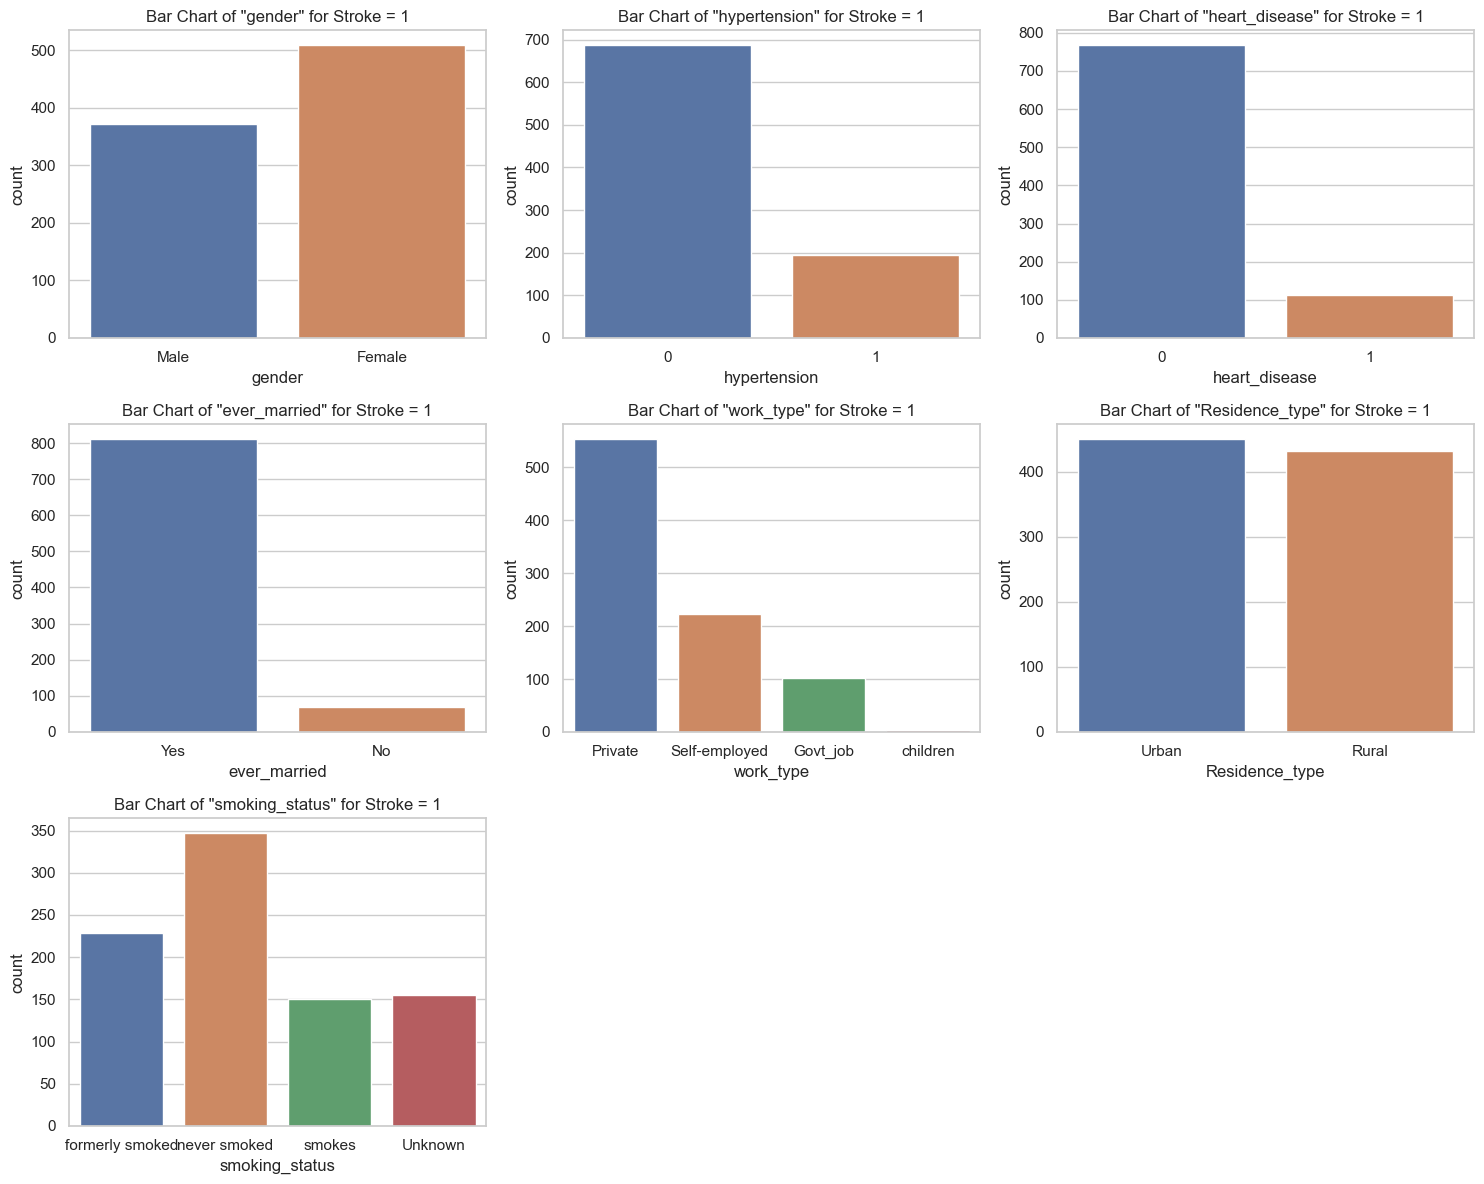

In [3]:
# Numerical features - histogram 

sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[df['stroke'] == 1][feature], bins=30, kde=True)
    plt.title(f'Histogram of "{feature}" for Stroke = 1')

plt.tight_layout()
plt.show()

# Categorical features - bar chart
plt.figure(figsize=(15, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=df[df['stroke'] == 1])
    plt.title(f'Bar Chart of "{feature}" for Stroke = 1')
    
plt.tight_layout()
plt.show()

<hr style="border:2px solid gray">

## 2. Pre-processing the data

### Dropping rows with missing data

In [4]:
print("Dataset before processing:")
print("-" * 25)
print(f"Shape: {df.shape}\n")

print(df.astype('object').describe(include='all').loc['unique', :])
print()
print()

print("Dataset after processing:")
print("-" * 25)

df = df[df.smoking_status != "Unknown"]
print(f"Shape after filtering out 'Unknown' values from smoking_status: {df.shape}")

df = df.dropna()
print(f"Shape after dropping NA values: {df.shape}\n")

print(df.astype('object').describe(include='all').loc['unique', :])

Dataset before processing:
-------------------------
Shape: (20414, 12)

id                    19309
gender                    3
age                   106.0
hypertension              2
heart_disease             2
ever_married              2
work_type                 5
Residence_type            2
avg_glucose_level    4644.0
bmi                   440.0
smoking_status            4
stroke                    2
Name: unique, dtype: object


Dataset after processing:
-------------------------
Shape after filtering out 'Unknown' values from smoking_status: (14327, 12)
Shape after dropping NA values: (14187, 12)

id                    13712
gender                    3
age                    82.0
hypertension              2
heart_disease             2
ever_married              2
work_type                 5
Residence_type            2
avg_glucose_level    4053.0
bmi                   406.0
smoking_status            3
stroke                    2
Name: unique, dtype: object


### Standardizing numerical data

In [5]:
from sklearn.preprocessing import StandardScaler

num_cols = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols = num_cols.delete([0, 2, 3, 6])
print(f"numerical data to standardize: {num_cols}\n")

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])
print(df.head())

numerical data to standardize: Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

      id  gender       age  hypertension  heart_disease ever_married  \
0   9046    Male  1.091476             0              1          Yes   
2  31112    Male  1.816131             0              1          Yes   
3  60182  Female  0.088109             0              0          Yes   
4   1665  Female  1.760388             1              0          Yes   
5  56669    Male  1.871874             0              0          Yes   

       work_type Residence_type  avg_glucose_level       bmi   smoking_status  \
0        Private          Urban           3.922342  1.080068  formerly smoked   
2        Private          Rural           0.342755  0.443161     never smoked   
3        Private          Urban           2.246989  0.738313           smokes   
4  Self-employed          Rural           2.331253 -0.877257     never smoked   
5        Private          Urban           2.683759 -0.100541  formerly 

### One-hot encoding categorical features

In [6]:
df = pd.get_dummies(df, columns=['gender', 'work_type', 'Residence_type', 'smoking_status'],  dtype=int)
df.replace({"Yes": 1, "No": 0}, inplace=True)

print(df.head())

      id       age  hypertension  heart_disease  ever_married  \
0   9046  1.091476             0              1             1   
2  31112  1.816131             0              1             1   
3  60182  0.088109             0              0             1   
4   1665  1.760388             1              0             1   
5  56669  1.871874             0              0             1   

   avg_glucose_level       bmi  stroke  gender_Female  gender_Male  ...  \
0           3.922342  1.080068       1              0            1  ...   
2           0.342755  0.443161       1              0            1  ...   
3           2.246989  0.738313       1              1            0  ...   
4           2.331253 -0.877257       1              1            0  ...   
5           2.683759 -0.100541       1              0            1  ...   

   work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                   0                       0                  1   
2                   0 

<hr style="border:2px solid gray">

## 3. Dataset correlation exploration

### Feature correlation heatmap

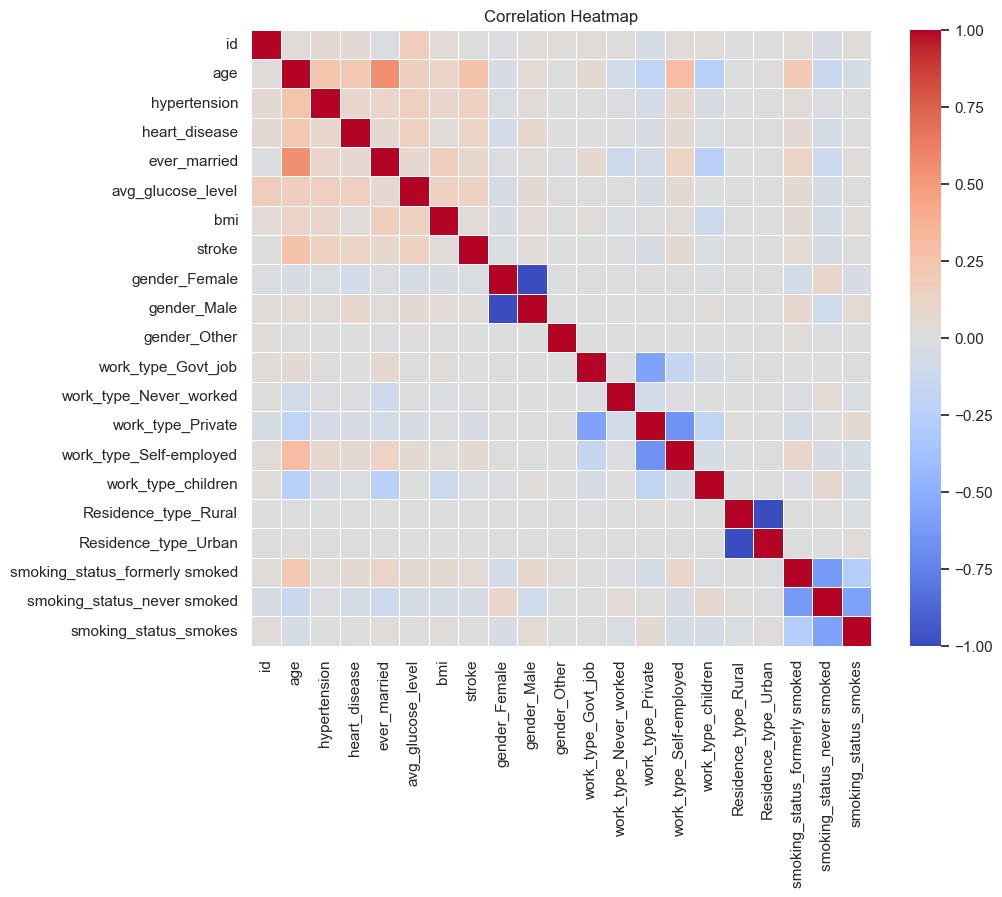

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Feature correlation with stroke likelihood

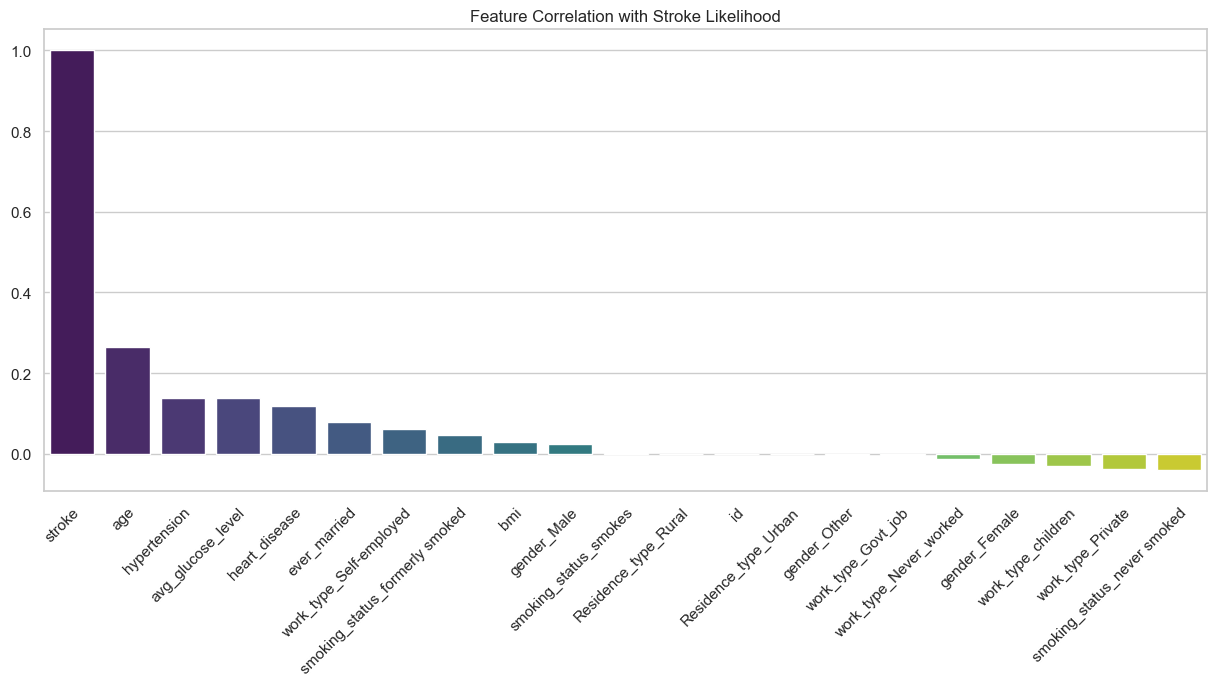

In [8]:
correlation_with_target = correlation_matrix['stroke'].sort_values(ascending=False)

plt.figure(figsize=(15, 6))

sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Feature Correlation with Stroke Likelihood')
plt.show()

### Plotting the distribution of stroke = 0 and stroke = 1.
There's a heavy class imbalance in the dataset favoring the majority class, stroke = 0.

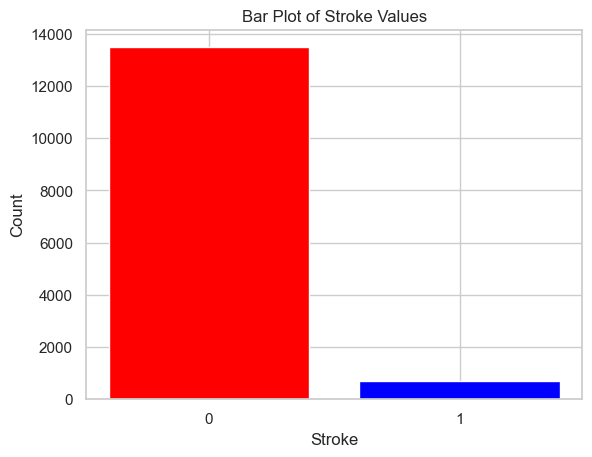

In [9]:
stroke_counts = df['stroke'].value_counts()

# Create a bar plot
plt.bar(stroke_counts.index, stroke_counts.values, color=['red', 'blue'])

# Add labels and title
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.title('Bar Plot of Stroke Values')

# Show the plot
plt.show()

<hr style="border:2px solid gray">

## 4. Train-test-weight split + synthetic sampling for class imbalance mitigation

In [10]:
from sklearn.model_selection  import train_test_split
from sklearn.utils import class_weight
import time

weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=df['stroke'])

w = [weights[0] if stroke == 0 else weights[1] for stroke in df['stroke']]
y = df.pop('stroke')
X = df.to_numpy()

In [11]:
def train_test_weight_data():
    seed = np.random.seed(0)
    return train_test_split(X, y, w, test_size=0.2, random_state=seed)

X_tr, X_te, y_tr, y_te, w_tr, w_te = train_test_weight_data()
print(len(X_tr), len(X_te), len(y_tr), len(y_te), len(w_tr), len(w_te))

11349 2838 11349 2838 11349 2838


### Generating synthetically sampled data for training using SMOTE in order to mitigate the negative effect originating from the strong class imbalance.
Ref: https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688


In [12]:
from imblearn.over_sampling import SMOTE

def smote_sample(X_tr, y_tr):
    sm = SMOTE(random_state=0)

    # Synethetic sampling - balancing the minority class with the majority class by generating extra synthetic samples for training
    X_res, y_res = sm.fit_resample(X_tr, y_tr)
    return X_res, y_res

X_res, y_res = smote_sample(X_tr, y_tr)
print(f"SMOTE synethetically sampled data - X.shape: {X_res.shape}, y.shape: {y_res.shape}")

SMOTE synethetically sampled data - X.shape: (21592, 20), y.shape: (21592,)


<hr style="border:2px solid gray">

## 5. Model Exploration

### Defining model evaluation metrics & functions

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, auc, precision_recall_curve

def weight_accuracy(predicted_y, true_y, weight):
    sum_weighted_correct_predictions = 0
    for yhat, y, w in zip(predicted_y, true_y, weight):
        if yhat == y:
            sum_weighted_correct_predictions += (1 * w)

    total_weight = sum(weight)
    return sum_weighted_correct_predictions / total_weight


def eval_model(predicted_y, true_y, weight):
    # Calculate precision, recall, and f1 score (useful for problems w/ class imbalances)
    precision = precision_score(true_y, predicted_y, sample_weight=weight)
    recall = recall_score(true_y, predicted_y, sample_weight=weight)
    f1 = f1_score(true_y, predicted_y, sample_weight=weight)
    weighted_accuracy = weight_accuracy(predicted_y, true_y, weight)

    # Print metrics
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Weighted accuracy:", weighted_accuracy)

    print("-" * 20)
    
    # Print classification report and confusion matrix
    print("Classification Report:\n", classification_report(true_y, predicted_y, sample_weight=weight))
    print("\nConfusion Matrix:\n", confusion_matrix(true_y, predicted_y, sample_weight=weight))

    # Graph PR-curve
    p, r, _ = precision_recall_curve(true_y, predicted_y, sample_weight=weight)
    pr_auc = auc(r, p)
    plt.figure(figsize=(8, 8))
    plt.plot(r, p, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(pr_auc))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower right')
    plt.show()

### Defining grid-search helper functions for hyperparmeter-tuning

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import ClassifierMixin


def do_grid_search(classifier: ClassifierMixin, param_grid: dict, n_jobs=4) -> GridSearchCV:
    """
    Perform a GridSearchCV using the provided classifier model and parameter grid.
    """
    X_tr, X_te, y_tr, y_te, w_tr, w_te = train_test_weight_data()
    X_res, y_res = smote_sample(X_tr, y_tr)

    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=5, n_jobs=n_jobs)
    grid_search.fit(X_res, y_res)

    """
    Evaluate the best model found by the GridSearchCV.
    """
    best_params = grid_search.best_params_
    print(f"Best parameters: {best_params}")
    print()

    best_model = grid_search.best_estimator_
    y_pred_te = best_model.predict(X_te)

    eval_model(y_pred_te, y_te, w_te)

    return grid_search
    

def plot_gridsearch_2d_hyperparameter_accuracy_heatmap(grid_search: GridSearchCV, param1_name: str, param2_name: str) -> None:
    """
    Plot a 2D heatmap showing the GridSearchCV's accuracy across the two hyperparameters' searched values.
    """
    df = pd.DataFrame(grid_search.cv_results_)

    heatmap_data = df.pivot_table(index=f"param_{param1_name}", columns=f"param_{param2_name}", values='mean_test_score')

    # Create heatmap of the mean test scores given certain hyperparameter configurations
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='vlag', fmt='.4f', cbar_kws={'label': 'Accuracy Score'})
    plt.title('Grid Search Results')
    plt.xlabel(param2_name)
    plt.ylabel(param1_name)
    plt.yticks(rotation=0)
    plt.show()


def do_grid_search_full_task(classifier: ClassifierMixin, param_grid: dict, param1_name: str=None, param2_name: str=None, n_jobs=4) -> GridSearchCV:
    """
    Performs grid search, evaluates the best model, and plots the heatmap of the two given params.
    returns: GridSearchCV
    """
    grid_search = do_grid_search(classifier, param_grid, n_jobs=n_jobs)
    print("\n" + "-" * 20)
    
    if param1_name and param2_name:
        plot_gridsearch_2d_hyperparameter_accuracy_heatmap(grid_search, param1_name, param2_name)

    return grid_search

<hr style="border:2px solid gray">

### A. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

def do_logistic_regression(X_tr, y_tr, X_te, y_te, w_tr, w_te):
    logistic_regression_model = LogisticRegression()

    # Train the model
    logistic_regression_model.fit(X_tr, y_tr)

    # Training weighted accuracy
    y_pred_tr = logistic_regression_model.predict(X_tr)
    if w_tr:
        print(f"Training accuracy: {weight_accuracy(y_pred_tr, y_tr, w_tr)}")
    else:
        print(f"Training score: {logistic_regression_model.score(X_tr, y_tr)}")

    # Validation weighted accuracy
    y_pred_te = logistic_regression_model.predict(X_te)
    print(f"Validation accuracy: {weight_accuracy(y_pred_te, y_te, w_te)}")

    print(f"Score: {logistic_regression_model.score(X_te, y_te, sample_weight=w_te)}\n")
    eval_model(y_pred_te, y_te, w_te)

#### An example of poor accuracy and results (will happen to all models) due to the majority/minority class imbalance issue

Very low recall / precision for class 1 means the classifier is predicting class 0 (the majority class) most of the time, which isn't ideal.

Training accuracy: 0.509837124645882
Validation accuracy: 0.4812733333825796
Score: 0.481273333382558

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Weighted accuracy: 0.4812733333825796
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.48      1.00      0.65 1413.6493732849112
           1       0.00      0.00      0.00 1521.4751420454538

    accuracy                           0.48 2935.1245153303653
   macro avg       0.24      0.50      0.32 2935.1245153303653
weighted avg       0.23      0.48      0.31 2935.1245153303653


Confusion Matrix:
 [[1.41259716e+03 1.05221390e+00]
 [1.52147514e+03 0.00000000e+00]]


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


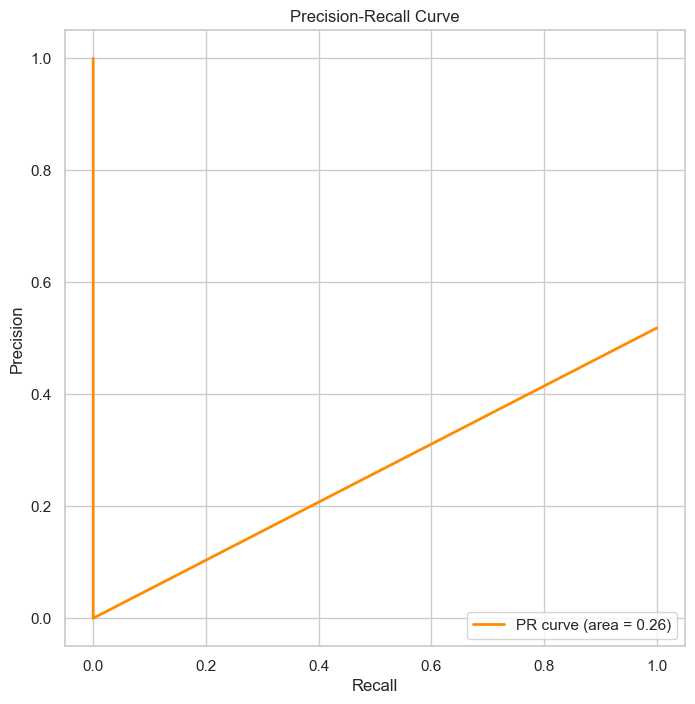

In [44]:
X_tr, X_te, y_tr, y_te, w_tr, w_te = train_test_weight_data()
do_logistic_regression(X_tr, y_tr, X_te, y_te, w_tr, w_te)

#### Improved: Mitigating the class imbalance issue using SMOTE - generates synthetic samples to balance the minority class and majority class data.
Improved precision, recall, and weighted accuracy.

Training score: 0.793442015561319
Validation accuracy: 0.7683851714325161
Score: 0.7683851714324925

Precision: 0.7775682369902973
Recall: 0.774834437086094
F1 Score: 0.7761989299108307
Weighted accuracy: 0.7683851714325161
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76 1413.6493732849112
           1       0.78      0.77      0.78 1521.4751420454538

    accuracy                           0.77 2935.1245153303653
   macro avg       0.77      0.77      0.77 2935.1245153303653
weighted avg       0.77      0.77      0.77 2935.1245153303653


Confusion Matrix:
 [[1076.41481866  337.23455462]
 [ 342.58380682 1178.89133523]]


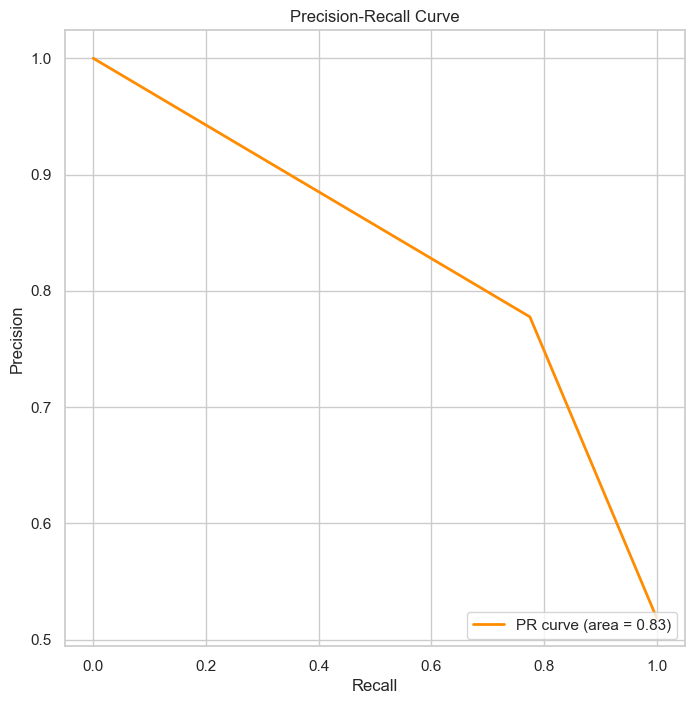

In [45]:
# Fitting the model using the synthetic samples
X_tr, X_te, y_tr, y_te, w_tr, w_te = train_test_weight_data()
X_res, y_res = smote_sample(X_tr, y_tr)

do_logistic_regression(X_res, y_res, X_te, y_te, None, w_te)

#### Grid-searching for the best hyperparameters

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

[CV 1/5] END C=100, penalty=l2, solver=newton-cg;, score=0.789 total time=   2.4s
[CV 2/5] END C=100, penalty=l2, solver=newton-cg;, score=0.803 total time=   2.5s
[CV 4/5] END C=100, penalty=l2, solver=newton-cg;, score=0.801 total time=   2.5s
[CV 3/5] END C=100, penalty=l2, solver=newton-cg;, score=0.791 total time=   2.5s
[CV 3/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.500 total time=   0.0s
[CV 1/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.785 total time=   0.1s
[CV 4/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.1s
[CV 2/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.2s
[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.789 total time=   0.0s
[CV 2/5] END C=100, penalty=l2, solver=liblinear;, score=0.803 total time=   0.0s
[CV 3/5] END C=100, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 4/5] END C=100, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 5/5] END ...C=10

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

[CV 5/5] END C=100, penalty=l2, solver=newton-cg;, score=0.801 total time=   2.0s


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, penalty=l2, solver=newton-cg;, score=0.803 total time=   2.1s
[CV 1/5] END C=10, penalty=l2, solver=newton-cg;, score=0.789 total time=   2.2s
[CV 3/5] END C=10, penalty=l2, solver=newton-cg;, score=0.791 total time=   2.3s


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.785 total time=   0.2s
[CV 3/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.500 total time=   0.0s
[CV 2/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.796 total time=   0.1s
[CV 4/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.2s
[CV 5/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.2s
[CV 2/5] END C=10, penalty=l2, solver=liblinear;, score=0.803 total time=   0.0s
[CV 1/5] END C=10, penalty=l2, solver=liblinear;, score=0.789 total time=   0.1s
[CV 3/5] END C=10, penalty=l2, solver=liblinear;, score=0.791 total time=   0.0s
[CV 4/5] END C=10, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 5/5] END C=10, penalty=l2, solver=liblinear;, score=0.801 total time=   0.0s


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

[CV 4/5] END C=10, penalty=l2, solver=newton-cg;, score=0.801 total time=   2.2s


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=10, penalty=l2, solver=newton-cg;, score=0.800 total time=   2.4s


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.789 total time=   2.2s


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.803 total time=   3.1s
[CV 1/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.786 total time=   0.2s
[CV 2/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.796 total time=   0.2s


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.500 total time=   0.0s


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.791 total time=   2.8s
[CV 4/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.796 total time=   0.2s
[CV 1/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.789 total time=   0.0s
[CV 5/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.764 total time=   0.1s
[CV 3/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.791 total time=   0.0s
[CV 2/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.803 total time=   0.0s
[CV 5/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.801 total time=   0.0s
[CV 4/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.801 total time=   0.0s


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.800 total time=   2.6s
[CV 5/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.800 total time=   2.3s


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

[CV 2/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.803 total time=   1.3s
[CV 1/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.789 total time=   1.3s
[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.785 total time=   0.2s
[CV 3/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.792 total time=   1.2s
[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.500 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.801 total time=   1.2s
[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.796 total time=   0.2s
[CV 5/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.764 total time=   0.0s
[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.787 total time=   0.1s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.804 total time=   0.0s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.788 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.801 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.801 total time=   0.0s


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

[CV 1/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.7s
[CV 2/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.7s
[CV 5/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.800 total time=   1.4s
[CV 3/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.792 total time=   0.9s
[CV 1/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.1s
[CV 3/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.500 total time=   0.0s
[CV 2/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.777 total time=   0.1s
[CV 4/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.777 total time=   0.1s
[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.764 total time=   0.1s
[CV 1/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.788 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 4/5] END C=

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

[CV 4/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.799 total time=   0.7s
[CV 5/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.801 total time=   0.7s
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Precision: 0.7870037084453668
Recall: 0.7947019867549681
F1 Score: 0.7908341135559289
Weighted accuracy: 0.7820895355181944
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77 1413.6493732849112
           1       0.79      0.79      0.79 1521.4751420454538

    accuracy                           0.78 2935.1245153303653
   macro avg       0.78      0.78      0.78 2935.1245153303653
weighted avg       0.78      0.78      0.78 2935.1245153303653


Confusion Matrix:
 [[1086.4108507   327.23852258]
 [ 312.35582386 1209.11931818]]


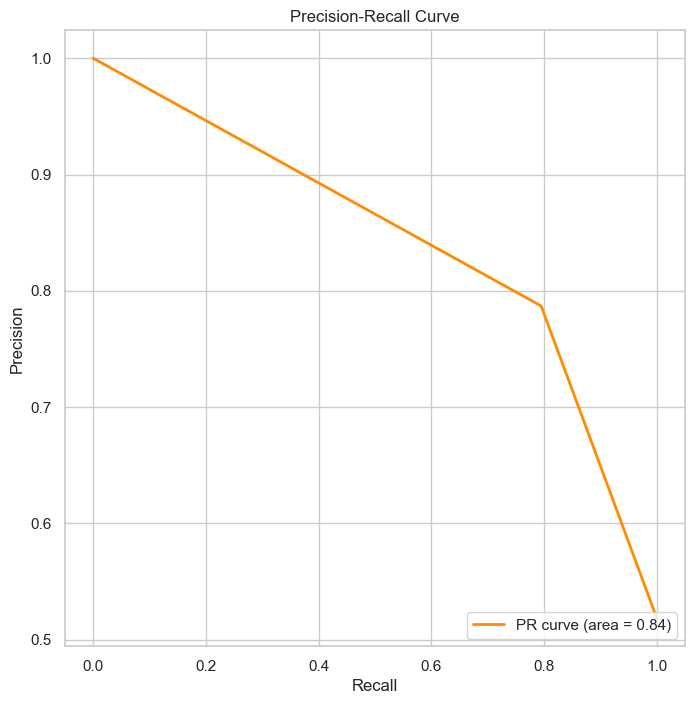


--------------------


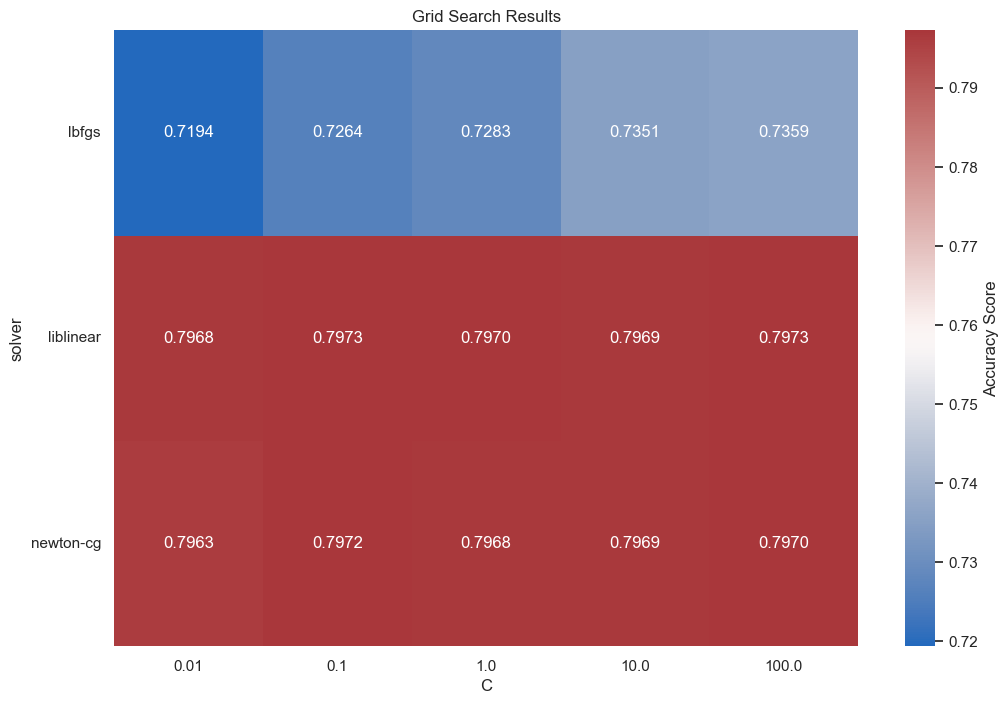

In [46]:
log_reg_model = LogisticRegression()
log_reg_param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'C': [100, 10, 1.0, 0.1, 0.01]
}
log_reg_grid_search = do_grid_search_full_task(log_reg_model, log_reg_param_grid, 'solver', 'C')

In [387]:
import joblib

joblib.dump(log_reg_grid_search, 'log_reg_grid_search_object.joblib')

['log_reg_grid_search_object.joblib']

[[-6.45303003e-06  1.87329014e+00  5.51776393e-01  6.32308552e-01
   5.53089560e-02  2.23989698e-01  1.38037262e-01 -3.21162374e-01
  -1.84859108e-01 -5.78116561e-04 -8.22414778e-02 -8.45157254e-03
  -6.30746812e-02 -3.16018424e-01 -3.68134436e-02 -2.26936900e-01
  -2.79662699e-01 -3.68597507e-01 -3.49801490e-01  2.11799397e-01]]
Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male',
       'gender_Other', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


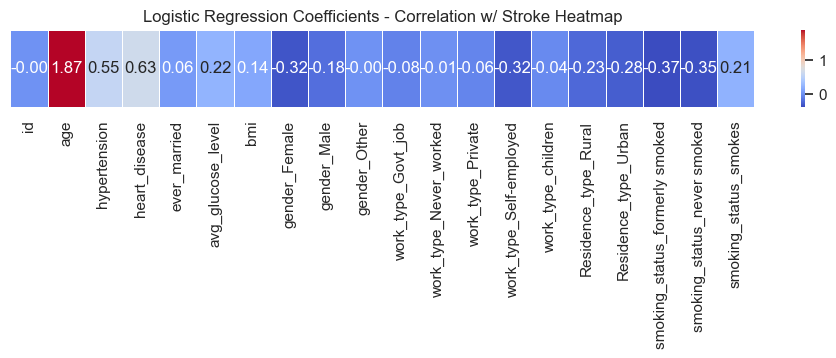

In [57]:
# Log-reg model's coefficients
coefficients = log_reg_grid_search.best_estimator_.coef_
print(coefficients)
print(df.columns)

coefficients_df = pd.DataFrame(coefficients, columns=df.columns)

# Plotting the heatmap
plt.figure(figsize=(12, 1))
sns.heatmap(coefficients_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, yticklabels=0)
plt.title('Logistic Regression Coefficients - Correlation w/ Stroke Heatmap')
plt.show()

<hr style="border:2px solid gray">

### B. Decision Tree Classifier

In [397]:
from sklearn.tree import DecisionTreeClassifier

def do_decision_tree_classification(X_tr, y_tr, X_te, y_te, w_tr, w_te):
    dt_model = DecisionTreeClassifier()

    # Train the model
    dt_model.fit(X_tr, y_tr)

    # Training weighted accuracy
    y_pred_tr = dt_model.predict(X_tr)
    if w_tr:
        print(f"Training accuracy: {weight_accuracy(y_pred_tr, y_tr, w_tr)}")
    else:
        print(f"Training score: {dt_model.score(X_tr, y_tr)}")

    # Validation weighted accuracy
    y_pred_te = dt_model.predict(X_te)
    print(f"Validation accuracy: {weight_accuracy(y_pred_te, y_te, w_te)}")

    print(f"Score: {dt_model.score(X_te, y_te, sample_weight=w_te)}\n")
    eval_model(y_pred_te, y_te, w_te)

Training score: 1.0
Validation accuracy: 0.5608065116925983
Score: 0.5608065116925661

Precision: 0.7961678613130739
Recall: 0.20529801324503313
F1 Score: 0.3264248623733556
Weighted accuracy: 0.5608065116925983
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.94      0.67 1413.6493732849112
           1       0.80      0.21      0.33 1521.4751420454538

    accuracy                           0.56 2935.1245153303653
   macro avg       0.66      0.57      0.50 2935.1245153303653
weighted avg       0.67      0.56      0.49 2935.1245153303653


Confusion Matrix:
 [[1333.68111696   79.96825632]
 [1209.11931818  312.35582386]]


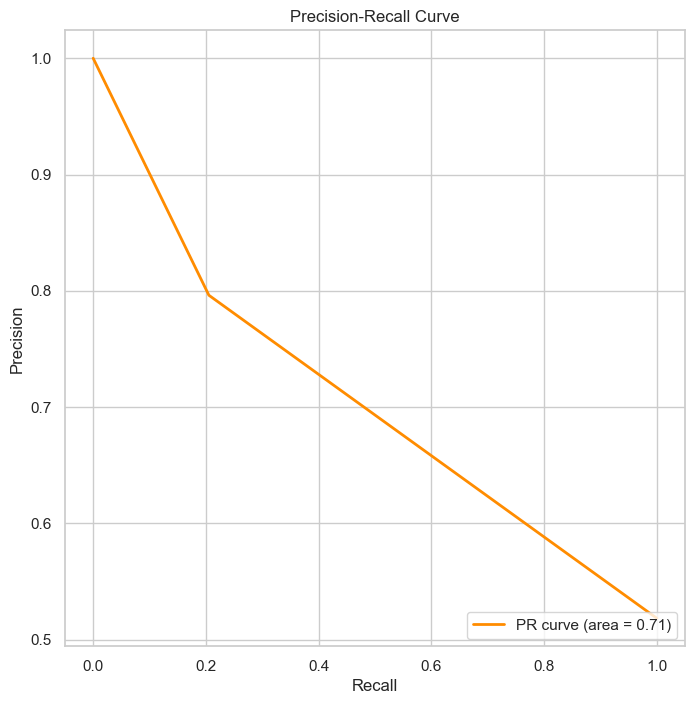

In [398]:
# Fitting the model using the synthetic samples
X_tr, X_te, y_tr, y_te, w_tr, w_te = train_test_weight_data()
X_res, y_res = smote_sample(X_tr, y_tr)

do_decision_tree_classification(X_res, y_res, X_te, y_te, None, w_te)

#### Grid-searching for best parameters

Fitting 5 folds for each of 441 candidates, totalling 2205 fits
[CV 2/5] END max_depth=None, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.0;, score=0.962 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.0;, score=0.964 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.0;, score=0.876 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.0;, score=0.961 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.1;, score=0.799 total time=   0.0s
[CV 5/5] END max_depth=None, max_feature

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_feature

[CV 3/5] END max_depth=None, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.0;, score=0.906 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.0;, score=0.783 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.0;, score=0.880 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.0;, score=0.862 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.2;, score=0.500 total time=

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_feature

[CV 4/5] END max_depth=None, max_features=auto, max_leaf_nodes=100, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=auto, max_leaf_nodes=100, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=auto, max_leaf_nodes=100, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=auto, max_leaf_nodes=100, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=auto, max_leaf_nodes=100, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=auto, max_leaf_nodes=70, min_impurity_decrease=0.0;, score=0.938 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=auto, max_leaf_nodes=100, min_impurity_decrease=0.0;, score=0.949 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=auto, max_leaf_nodes=100, min_impurity_decrease=0.2;, score=0.500 tota

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=50, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=20, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=50, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=70, min_impurity_decrease=0.0;, score=0.937 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=50, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=50, min_impurity_decrease=0.0;, score=0.834 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=50, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=70, min_impurity_decrease=0.1;, score=0.787 total time=

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_feature

[CV 5/5] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_impurity_decrease=0.0;, score=0.825 total time=   0.0s
[CV 2/5] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=10, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.0;, score=0.865 total time=   0.0s
[CV 1/5] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_impurity_decrease=0.0;, score=0.819 total time=   0.0s
[CV 1/5] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.1;, score=0.785 total time=   0.0s
[CV 2/5] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[C

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_feature

[CV 4/5] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 1/5] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_impurity_decrease=0.0;, score=0.854 total time=   0.0s
[CV 1/5] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=10, max_features=auto, max_leaf_nodes=100, min_impurity_decrease=0.0;, score=0.944 total time=   0.0s
[CV 3/5] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 1/5] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_impurity_decrease=0.1;, score=0.500 total time=   

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_feature

[CV 3/5] END max_depth=10, max_features=log2, max_leaf_nodes=70, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=10, max_features=log2, max_leaf_nodes=100, min_impurity_decrease=0.1;, score=0.803 total time=   0.0s
[CV 4/5] END max_depth=10, max_features=log2, max_leaf_nodes=70, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=10, max_features=log2, max_leaf_nodes=100, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 1/5] END max_depth=10, max_features=log2, max_leaf_nodes=100, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=10, max_features=log2, max_leaf_nodes=70, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=10, max_features=log2, max_leaf_nodes=100, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=20, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.0;, score=0.965 total time=   0.0s
[C

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_feature

[CV 2/5] END max_depth=20, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=20, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=20, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.0;, score=0.928 total time=   0.0s
[CV 3/5] END max_depth=20, max_features=auto, max_leaf_nodes=70, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=20, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=20, max_features=auto, max_leaf_nodes=70, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=20, max_features=auto, max_leaf_nodes=70, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=20, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 1/5]

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_feature

[CV 2/5] END max_depth=30, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=30, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.0;, score=0.919 total time=   0.0s
[CV 3/5] END max_depth=30, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=30, max_features=auto, max_leaf_nodes=30, min_impurity_decrease=0.0;, score=0.927 total time=   0.0s
[CV 4/5] END max_depth=30, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=30, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.0;, score=0.911 total time=   0.0s
[CV 1/5] END max_depth=30, max_features=auto, max_leaf_nodes=30, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=30, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 2/5]

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_feature

[CV 4/5] END max_depth=30, max_features=sqrt, max_leaf_nodes=10, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=30, max_features=auto, max_leaf_nodes=100, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=30, max_features=sqrt, max_leaf_nodes=None, min_impurity_decrease=0.0;, score=0.964 total time=   0.0s
[CV 5/5] END max_depth=30, max_features=sqrt, max_leaf_nodes=10, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=30, max_features=auto, max_leaf_nodes=100, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=30, max_features=sqrt, max_leaf_nodes=20, min_impurity_decrease=0.0;, score=0.911 total time=   0.0s
[CV 1/5] END max_depth=30, max_features=sqrt, max_leaf_nodes=10, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 1/5] END max_depth=30, max_features=sqrt, max_leaf_nodes=None, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[C

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_feature

[CV 3/5] END max_depth=50, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=50, max_features=auto, max_leaf_nodes=10, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=50, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=50, max_features=auto, max_leaf_nodes=30, min_impurity_decrease=0.0;, score=0.881 total time=   0.0s
[CV 5/5] END max_depth=50, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=50, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.0;, score=0.918 total time=   0.0s
[CV 1/5] END max_depth=50, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=50, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 3/5]

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_feature

[CV 3/5] END max_depth=50, max_features=sqrt, max_leaf_nodes=None, min_impurity_decrease=0.0;, score=0.967 total time=   0.0s
[CV 3/5] END max_depth=50, max_features=sqrt, max_leaf_nodes=20, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=50, max_features=sqrt, max_leaf_nodes=10, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=50, max_features=sqrt, max_leaf_nodes=10, min_impurity_decrease=0.0;, score=0.856 total time=   0.0s
[CV 4/5] END max_depth=50, max_features=sqrt, max_leaf_nodes=20, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=50, max_features=sqrt, max_leaf_nodes=30, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=50, max_features=sqrt, max_leaf_nodes=30, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=50, max_features=sqrt, max_leaf_nodes=20, min_impurity_decrease=0.1;, score=0.795 total time=   0.0s
[CV 3/

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_feature

[CV 2/5] END max_depth=70, max_features=auto, max_leaf_nodes=10, min_impurity_decrease=0.0;, score=0.834 total time=   0.0s
[CV 5/5] END max_depth=70, max_features=auto, max_leaf_nodes=30, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=70, max_features=auto, max_leaf_nodes=20, min_impurity_decrease=0.0;, score=0.881 total time=   0.0s
[CV 4/5] END max_depth=70, max_features=auto, max_leaf_nodes=30, min_impurity_decrease=0.0;, score=0.916 total time=   0.0s
[CV 1/5] END max_depth=70, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.0;, score=0.843 total time=   0.0s
[CV 1/5] END max_depth=70, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=70, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=70, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.0;, score=0.918 total time=   0.0s
[CV 3/5]

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_feature

[CV 4/5] END max_depth=70, max_features=sqrt, max_leaf_nodes=10, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 1/5] END max_depth=70, max_features=sqrt, max_leaf_nodes=20, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=70, max_features=sqrt, max_leaf_nodes=10, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=70, max_features=sqrt, max_leaf_nodes=10, min_impurity_decrease=0.0;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=70, max_features=sqrt, max_leaf_nodes=20, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=70, max_features=sqrt, max_leaf_nodes=20, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=70, max_features=sqrt, max_leaf_nodes=20, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 1/5] END max_depth=70, max_features=sqrt, max_leaf_nodes=20, min_impurity_decrease=0.0;, score=0.794 total time=   0.0s
[CV 2/5]

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_feature

[CV 3/5] END max_depth=70, max_features=log2, max_leaf_nodes=70, min_impurity_decrease=0.0;, score=0.950 total time=   0.0s
[CV 3/5] END max_depth=70, max_features=log2, max_leaf_nodes=100, min_impurity_decrease=0.0;, score=0.953 total time=   0.0s
[CV 2/5] END max_depth=100, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.0;, score=0.967 total time=   0.0s
[CV 2/5] END max_depth=100, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=100, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=70, max_features=log2, max_leaf_nodes=70, min_impurity_decrease=0.0;, score=0.956 total time=   0.0s
[CV 4/5] END max_depth=100, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.1;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=100, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.1;, score=0.500 total time=

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_feature

[CV 3/5] END max_depth=100, max_features=auto, max_leaf_nodes=30, min_impurity_decrease=0.1;, score=0.785 total time=   0.0s
[CV 4/5] END max_depth=100, max_features=auto, max_leaf_nodes=30, min_impurity_decrease=0.1;, score=0.803 total time=   0.0s
[CV 2/5] END max_depth=100, max_features=auto, max_leaf_nodes=70, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=100, max_features=auto, max_leaf_nodes=50, min_impurity_decrease=0.0;, score=0.918 total time=   0.0s
[CV 3/5] END max_depth=100, max_features=auto, max_leaf_nodes=70, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=100, max_features=auto, max_leaf_nodes=70, min_impurity_decrease=0.0;, score=0.932 total time=   0.0s
[CV 4/5] END max_depth=100, max_features=auto, max_leaf_nodes=70, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=100, max_features=auto, max_leaf_nodes=70, min_impurity_decrease=0.2;, score=0.500 total time=   0.0s


/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


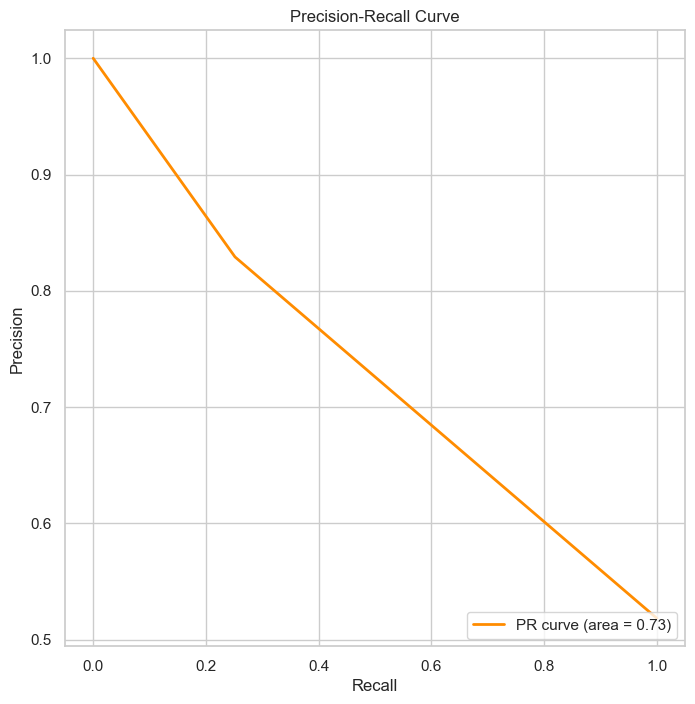


--------------------


In [41]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth': [None, 10, 20, 30, 50, 70, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 50, 70, 100],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}
dt_grid_search = do_grid_search_full_task(dt_model, dt_param_grid)

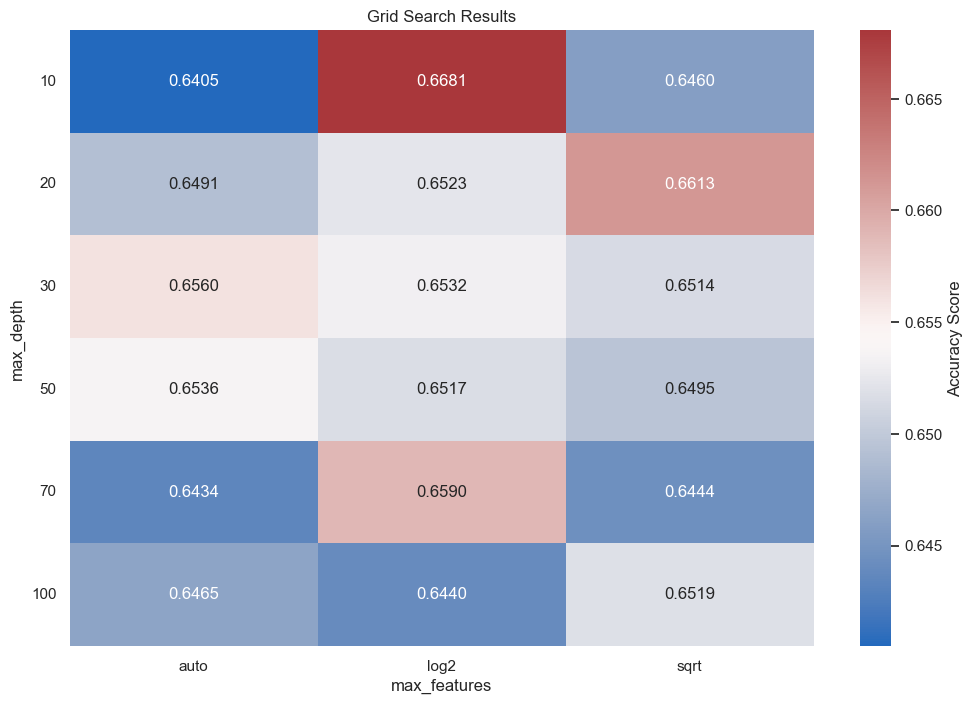

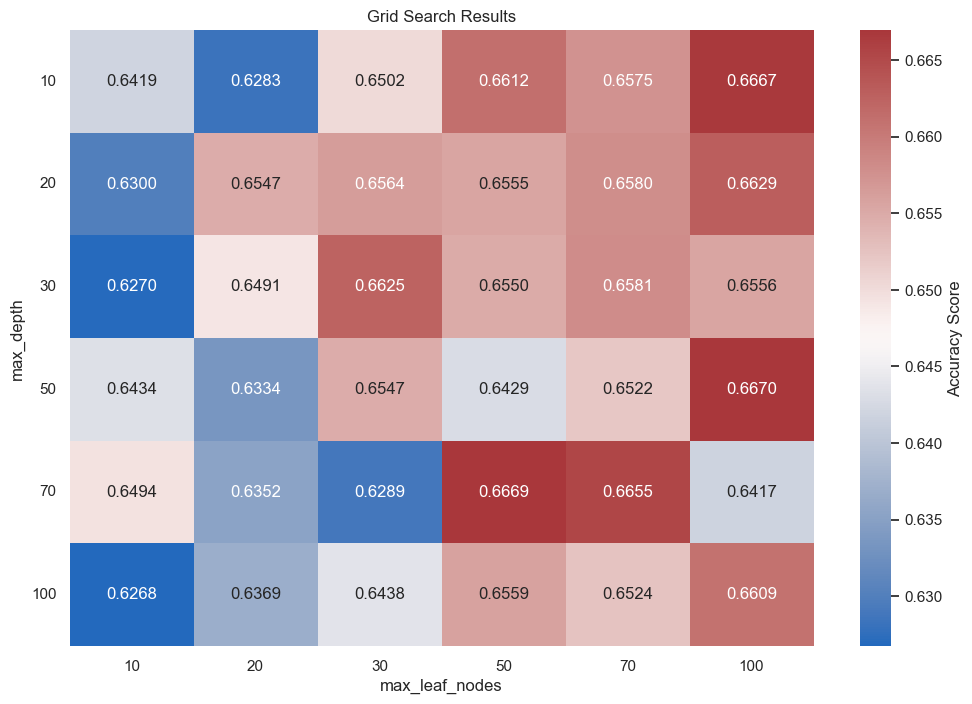

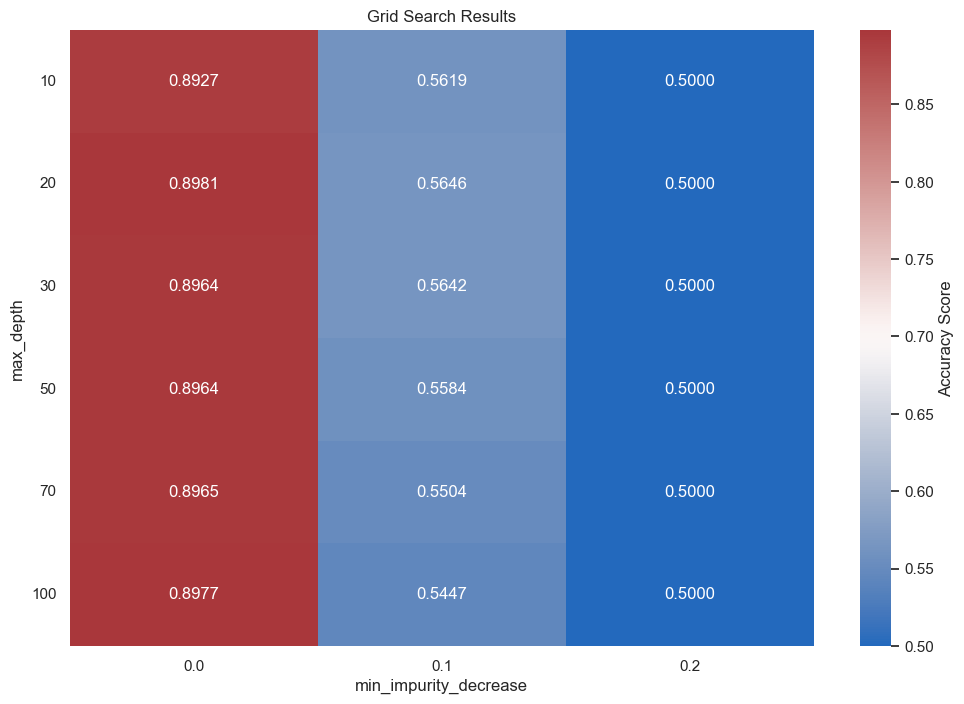

In [399]:
plot_gridsearch_2d_hyperparameter_accuracy_heatmap(dt_grid_search, "max_depth", "max_features")
plot_gridsearch_2d_hyperparameter_accuracy_heatmap(dt_grid_search, "max_depth", "max_leaf_nodes")
plot_gridsearch_2d_hyperparameter_accuracy_heatmap(dt_grid_search, "max_depth", "min_impurity_decrease")

In [400]:
import joblib

joblib.dump(dt_grid_search, 'dt_grid_search_object.joblib')

['dt_grid_search_object.joblib']

<hr style="border:2px solid gray">

### C. Random Forest Classifier

In [401]:
from sklearn.ensemble import RandomForestClassifier

def do_random_forest_classification(X_tr, y_tr, X_te, y_te, w_tr, w_te):
    rf_model = RandomForestClassifier()

    # Train the model
    rf_model.fit(X_tr, y_tr)

    # Training weighted accuracy
    y_pred_tr = rf_model.predict(X_tr)
    if w_tr:
        print(f"Training accuracy: {weight_accuracy(y_pred_tr, y_tr, w_tr)}")
    else:
        print(f"Training score: {rf_model.score(X_tr, y_tr)}")

    # Validation weighted accuracy
    y_pred_te = rf_model.predict(X_te)
    print(f"Validation accuracy: {weight_accuracy(y_pred_te, y_te, w_te)}")

    print(f"Score: {rf_model.score(X_te, y_te, sample_weight=w_te)}\n")
    eval_model(y_pred_te, y_te, w_te)

Training score: 1.0
Validation accuracy: 0.48870411584130036
Score: 0.4887041158412775

Precision: 0.7614502739029759
Recall: 0.01986754966887418
F1 Score: 0.038724705057887464
Weighted accuracy: 0.48870411584130036
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.99      0.65 1413.6493732849112
           1       0.76      0.02      0.04 1521.4751420454538

    accuracy                           0.49 2935.1245153303653
   macro avg       0.62      0.51      0.35 2935.1245153303653
weighted avg       0.63      0.49      0.33 2935.1245153303653


Confusion Matrix:
 [[1404.17944819    9.46992509]
 [1491.24715909   30.22798295]]


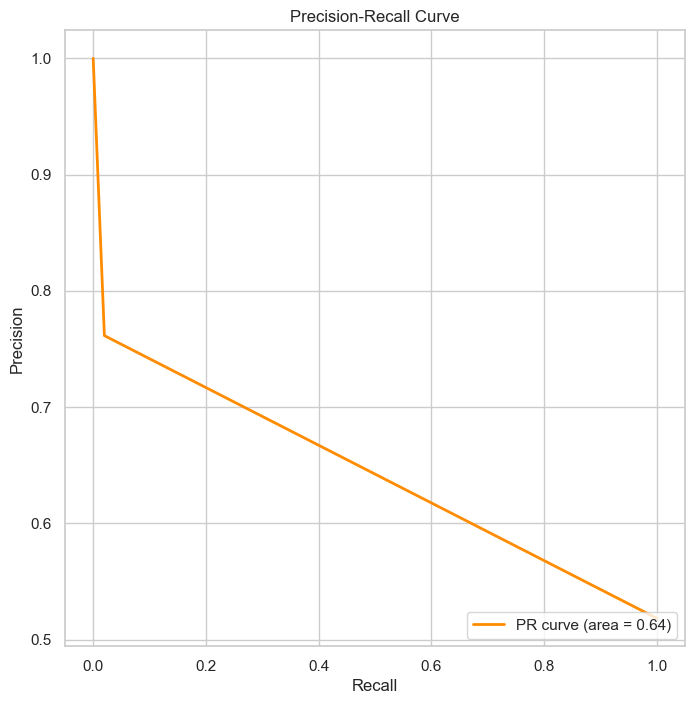

In [403]:
# Fitting the model using the synthetic samples
X_tr, X_te, y_tr, y_te, w_tr, w_te = train_test_weight_data()
X_res, y_res = smote_sample(X_tr, y_tr)

do_random_forest_classification(X_res, y_res, X_te, y_te, None, w_te)

#### Grid-searching

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.876 total time=   1.7s
[CV 2/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.994 total time=   1.8s
[CV 4/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.994 total time=   1.8s
[CV 5/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.995 total time=   1.9s
[CV 3/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.992 total time=   2.0s
[CV 1/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.876 total time=   3.2s
[CV 2/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.994 tot

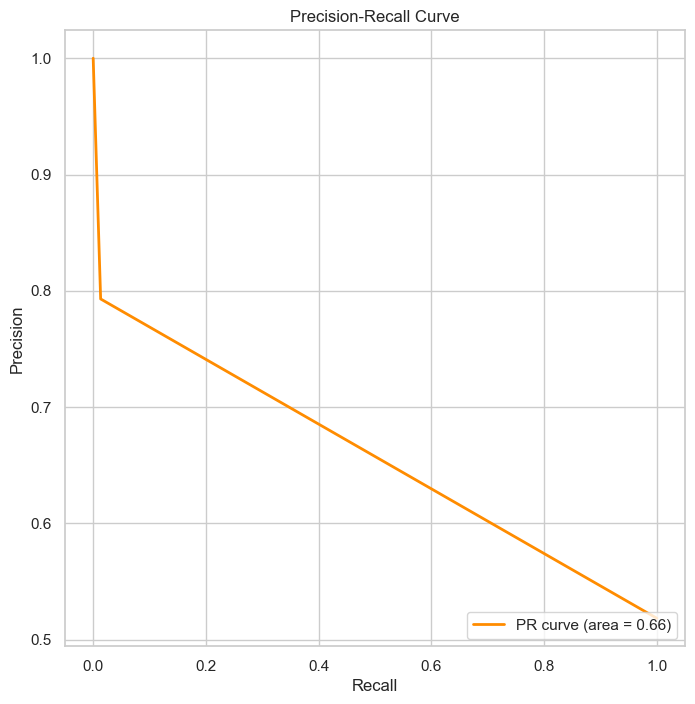


--------------------


In [406]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200, 400, 800],
    'max_depth': [None, 2, 4, 8, 16, 32, 64, 128],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_grid_search = do_grid_search_full_task(rf_model, rf_param_grid, n_jobs=7)

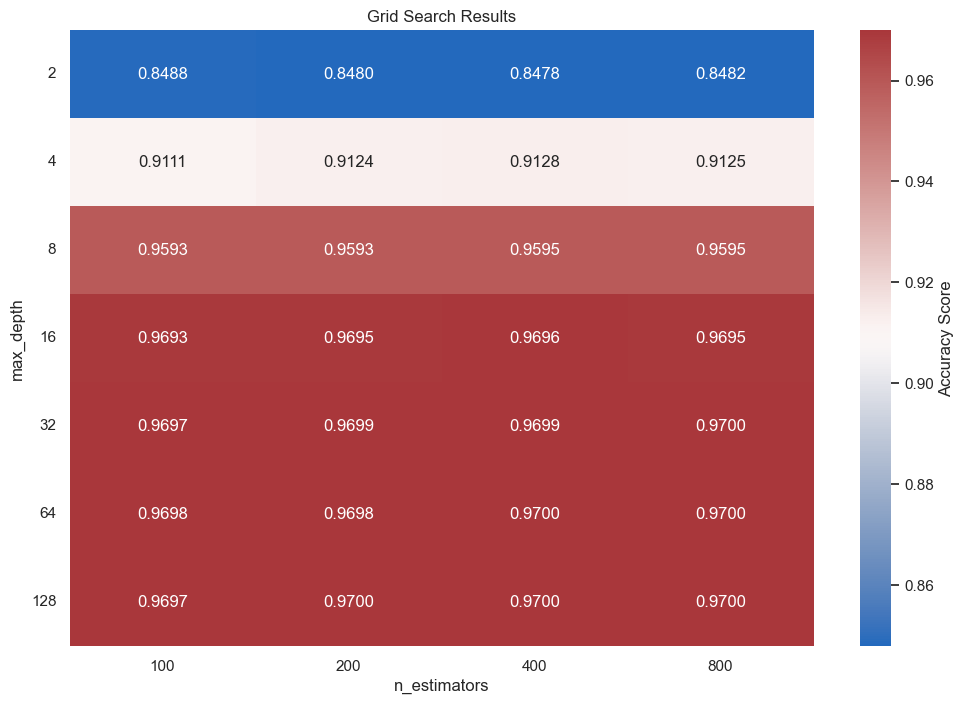

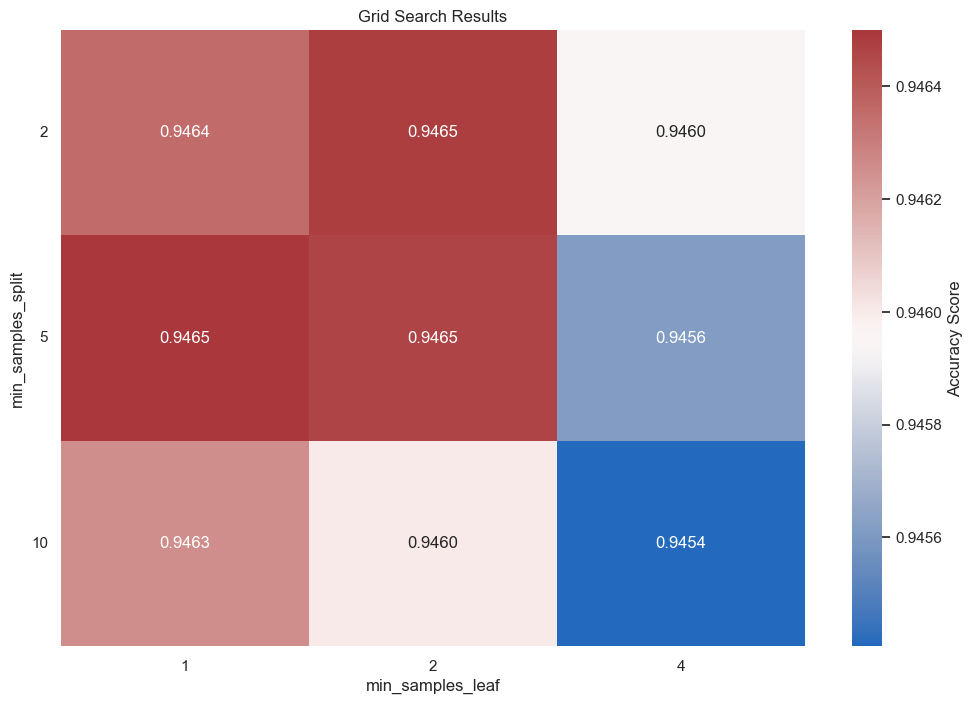

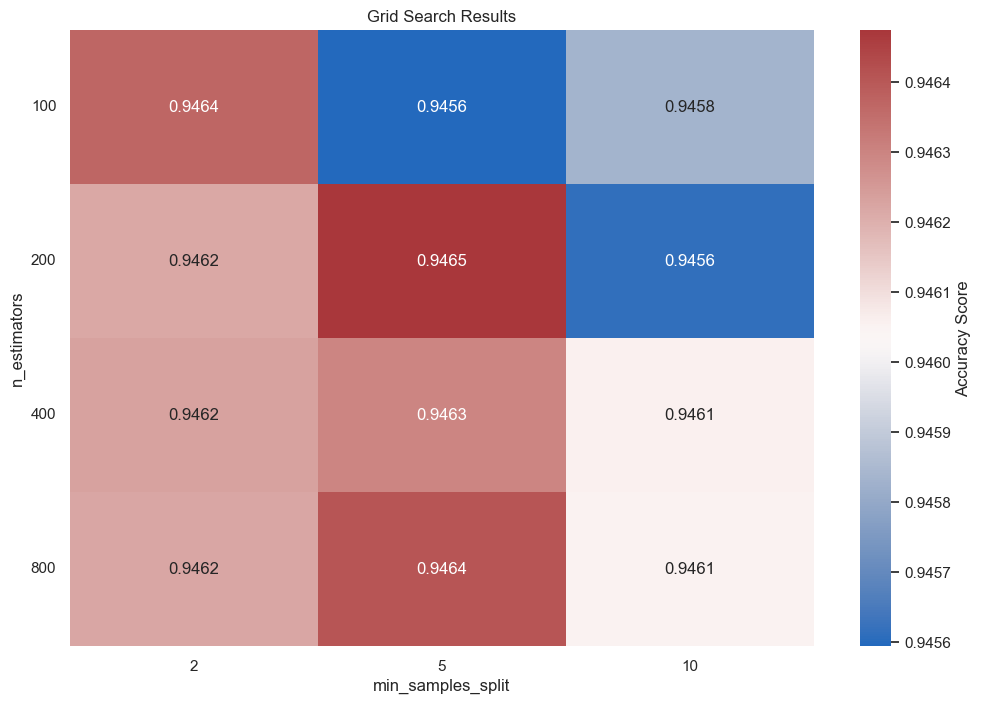

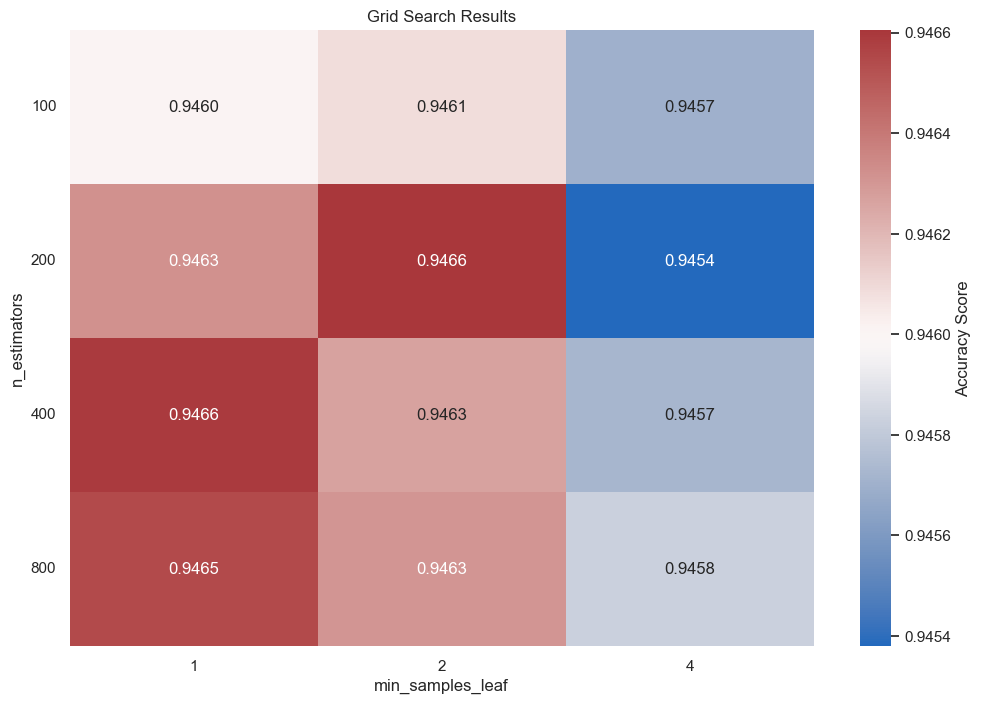

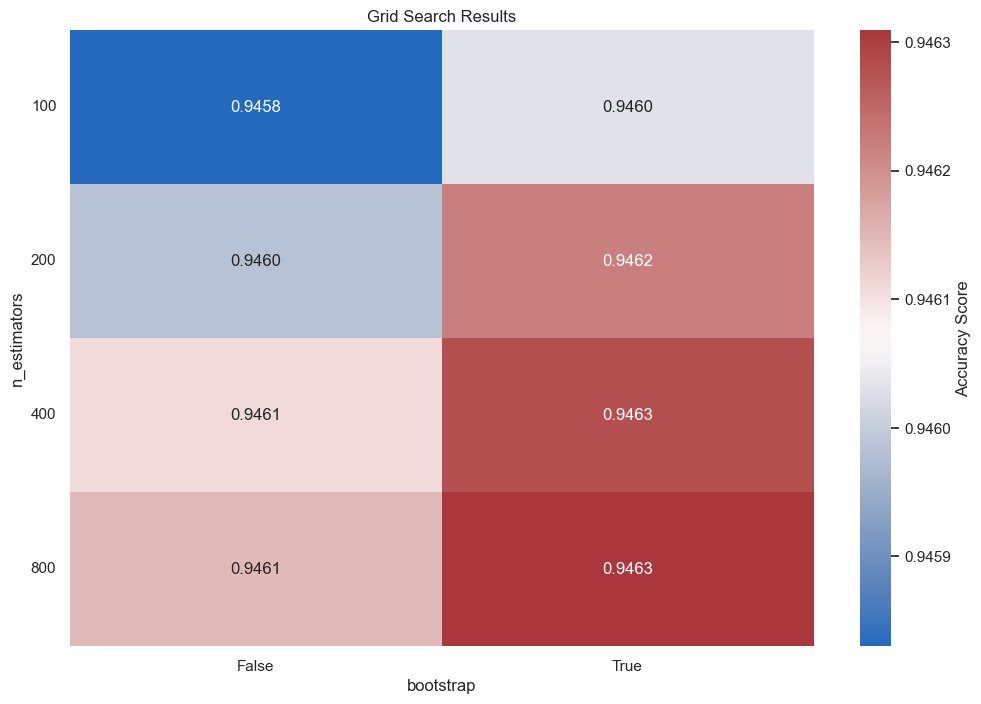

In [407]:
plot_gridsearch_2d_hyperparameter_accuracy_heatmap(rf_grid_search, "max_depth", 'n_estimators')
plot_gridsearch_2d_hyperparameter_accuracy_heatmap(rf_grid_search, "min_samples_split", 'min_samples_leaf')
plot_gridsearch_2d_hyperparameter_accuracy_heatmap(rf_grid_search, "n_estimators", 'min_samples_split')
plot_gridsearch_2d_hyperparameter_accuracy_heatmap(rf_grid_search, "n_estimators", 'min_samples_leaf')
plot_gridsearch_2d_hyperparameter_accuracy_heatmap(rf_grid_search, "n_estimators", 'bootstrap')

In [263]:
import joblib

joblib.dump(rf_grid_search, 'rf_grid_search_object.joblib')

['rf_grid_search_object.joblib']

<hr style="border:2px solid gray">

### D. K-nearest Neighbors

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.741 total time=   0.5s
[CV 4/5] END .....................n_neighbors=1;, score=0.739 total time=   0.4s
[CV 2/5] END .....................n_neighbors=1;, score=0.722 total time=   0.5s
[CV 3/5] END .....................n_neighbors=1;, score=0.733 total time=   0.5s
[CV 5/5] END .....................n_neighbors=1;, score=0.738 total time=   0.3s
[CV 1/5] END .....................n_neighbors=2;, score=0.736 total time=   0.4s
[CV 2/5] END .....................n_neighbors=2;, score=0.725 total time=   0.4s
[CV 3/5] END .....................n_neighbors=2;, score=0.733 total time=   0.5s
[CV 4/5] END .....................n_neighbors=2;, score=0.731 total time=   0.3s
[CV 5/5] END .....................n_neighbors=2;, score=0.735 total time=   0.4s
[CV 1/5] END .....................n_neighbors=3;, score=0.708 total time=   0.4s
[CV 2/5] END .....................n_neighbors=3

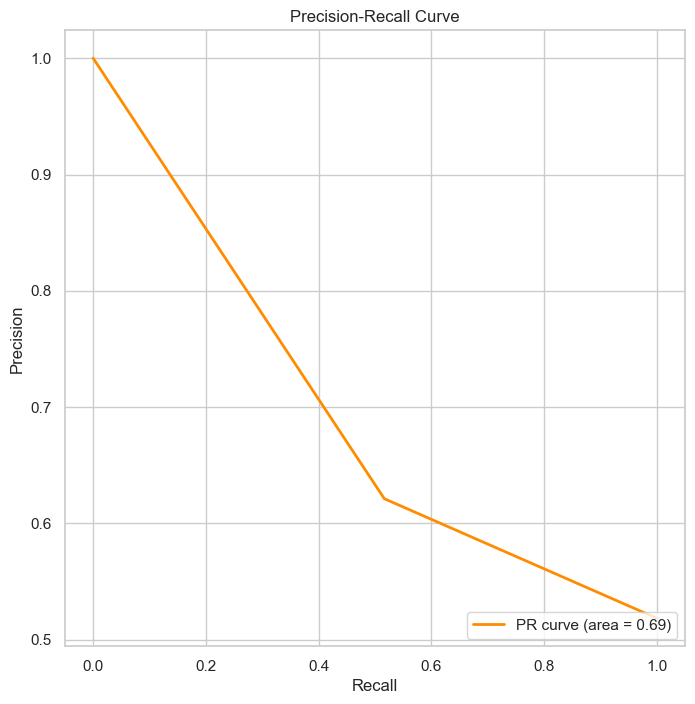


--------------------


In [411]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': list(range(1, 100)),
}
knn_grid_search = do_grid_search_full_task(knn_model, knn_param_grid)

1
2
3
4
5
6
7
8
9
10


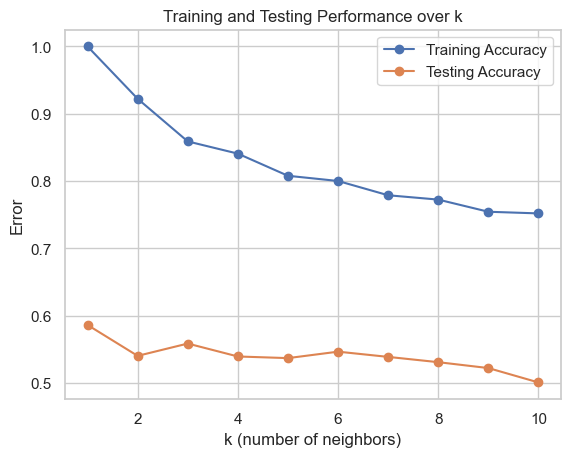

In [415]:
from sklearn.neighbors import KNeighborsClassifier

X_tr, X_te, y_tr, y_te, w_tr, w_te = train_test_weight_data()
X_res, y_res = smote_sample(X_tr, y_tr)

tr_acc = []
te_acc = []

def do_kNN(k: int):
    global tr_acc
    global te_acc

    knn = KNeighborsClassifier(k)
    knn.fit(X_res, y_res)
    y_tr_pred = knn.predict(X_res)
    y_te_pred = knn.predict(X_te)

    tr_acc.append(knn.score(X_res, y_res))
    te_acc.append(weight_accuracy(y_te_pred, y_te, w_te))


#k_values = np.linspace(1, np.sqrt(len(X_tr)), 10, endpoint=True, dtype=int)
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in k_values:
    print(k)
    do_kNN(k)

# Create a plot
plt.plot(k_values, tr_acc, marker='o', linestyle='-', label='Training Accuracy')
plt.plot(k_values, te_acc, marker='o', linestyle='-', label='Testing Accuracy')

# Add labels and title
plt.xlabel('k (number of neighbors)')
plt.ylabel('Error')
plt.title('Training and Testing Performance over k')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<hr style="border:2px solid gray">

### E. Multi-Layer Perceptron

#### Test-run

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), max_iter=100;, score=0.633 total time=   0.7s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), max_iter=100;, score=0.792 total time=   0.9s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), max_iter=100;, score=0.716 total time=   0.9s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), max_iter=200;, score=0.607 total time=   1.3s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), max_iter=200;, score=0.642 total time=   1.4s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), max_iter=200;, score=0.644 total time=   0.8s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), max_iter=100;, score=0.795 total time=   1.8s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), max_iter=100;, score=0.778 total time=   1.9s
[CV 3/5] END activ

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 128), max_iter=100;, score=0.716 total time=  19.3s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 128), max_iter=200;, score=0.731 total time=  11.9s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 128), max_iter=300;, score=0.590 total time=   5.4s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 128), max_iter=300;, score=0.577 total time=  10.8s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 128), max_iter=300;, score=0.674 total time=   8.3s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 128), max_iter=300;, score=0.767 total time=  16.9s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 128), max_iter=200;, score=0.785 total time=  18.4s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 128), max_iter=300;, score=0.753 total time=  20.4s
[CV 3/5] END activation=relu, alpha=0.00

/Users/brianlin/anaconda3/envs/184a_stroke_prediction/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(256, 256), max_iter=100;, score=0.704 total time= 1.1min
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(256, 256), max_iter=200;, score=0.598 total time=  35.9s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(256, 256), max_iter=200;, score=0.608 total time=  44.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(256, 256), max_iter=300;, score=0.575 total time=  47.2s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(256, 256), max_iter=200;, score=0.760 total time= 1.2min
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(256, 256), max_iter=300;, score=0.606 total time=  44.9s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(256, 256), max_iter=300;, score=0.553 total time=  45.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(256, 256), max_iter=100;, score=0.584 total time=  41.4s
[CV 3/5] END activation=relu, alpha=0.01, hidden

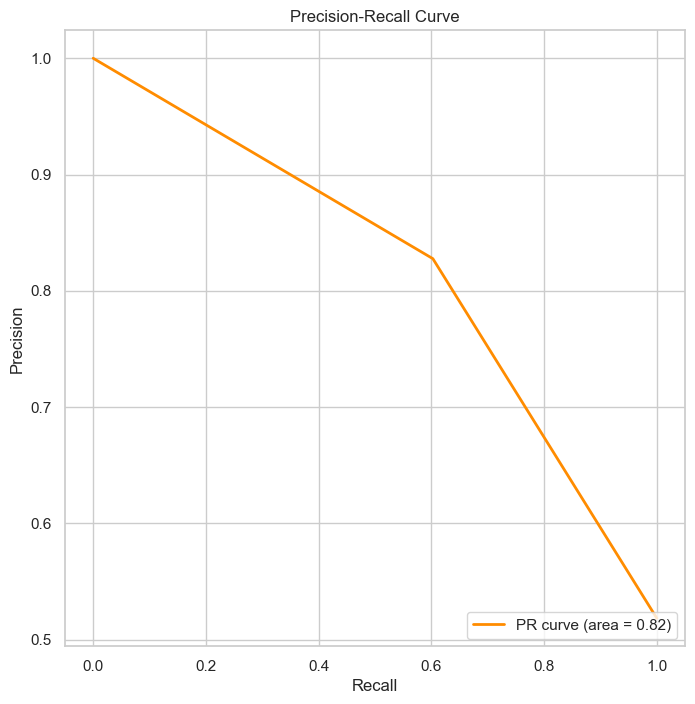


--------------------


In [417]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier()
mlp_param_grid = {
    'hidden_layer_sizes': [(64,), (64, 64), (128,), (128, 128), (256, 256), (256, 256)],
    'activation': ['relu'],
    'alpha': [0.001, 0.01],
    'max_iter': [100, 200, 300],
}

mlp_grid_search = do_grid_search_full_task(mlp_model, mlp_param_grid, n_jobs=7)

#### Grid-searching

[64]
Precision: 0.8410999238936518
Recall: 0.3642384105960267
F1 Score: 0.5083400911847232
Weighted accuracy: 0.6347716316990415
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.93      0.71 1413.6493732849112
           1       0.84      0.36      0.51 1521.4751420454538

    accuracy                           0.63 2935.1245153303653
   macro avg       0.71      0.65      0.61 2935.1245153303653
weighted avg       0.71      0.63      0.61 2935.1245153303653


Confusion Matrix:
 [[1308.95409034  104.69528295]
 [ 967.29545455  554.1796875 ]]


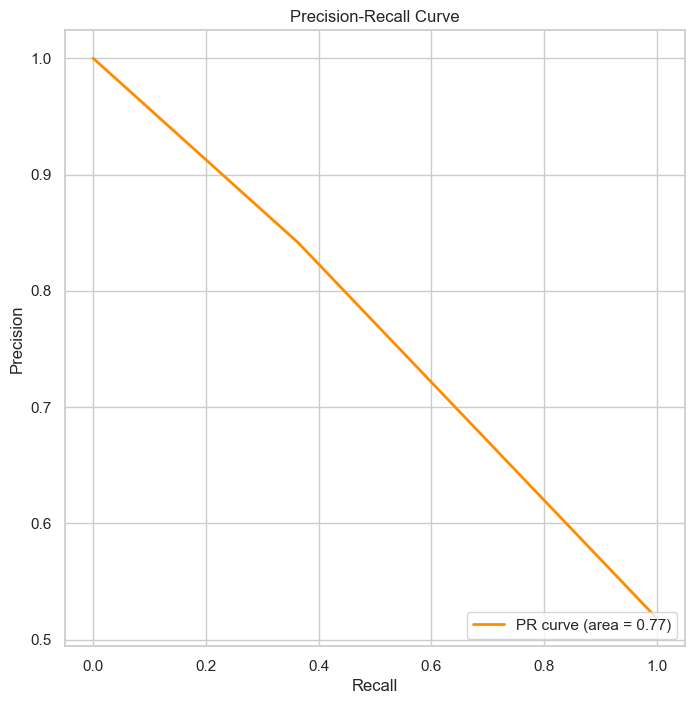

[128]
Precision: 0.7980179386682487
Recall: 0.7814569536423853
F1 Score: 0.7896506241911433
Weighted accuracy: 0.78418599132649
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78 1413.6493732849112
           1       0.80      0.78      0.79 1521.4751420454538

    accuracy                           0.78 2935.1245153303653
   macro avg       0.78      0.78      0.78 2935.1245153303653
weighted avg       0.78      0.78      0.78 2935.1245153303653


Confusion Matrix:
 [[1112.71619818  300.93317511]
 [ 332.5078125  1188.96732955]]


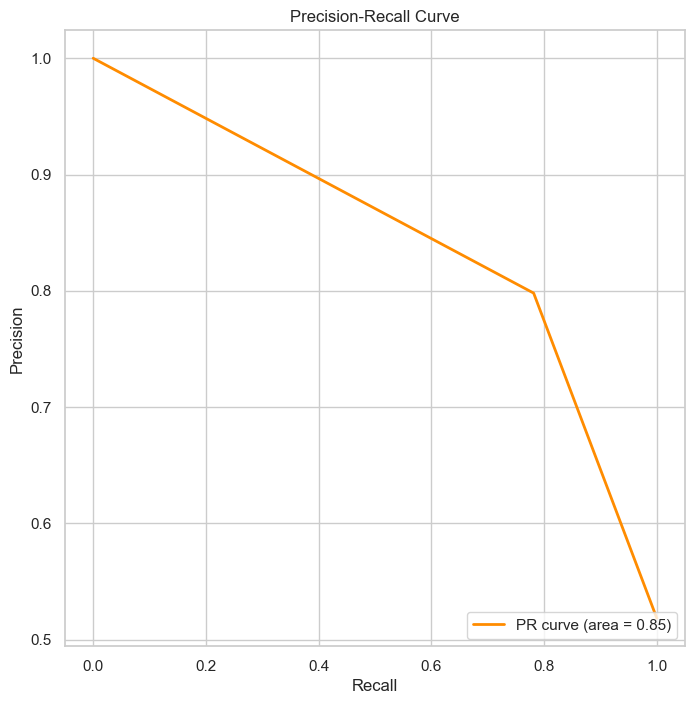

[256]
Precision: 0.7858684669002297
Recall: 0.7880794701986767
F1 Score: 0.7869724155960579
Weighted accuracy: 0.778835878878141
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77 1413.6493732849112
           1       0.79      0.79      0.79 1521.4751420454538

    accuracy                           0.78 2935.1245153303653
   macro avg       0.78      0.78      0.78 2935.1245153303653
weighted avg       0.78      0.78      0.78 2935.1245153303653


Confusion Matrix:
 [[1086.93695765  326.71241563]
 [ 322.43181818 1199.04332386]]


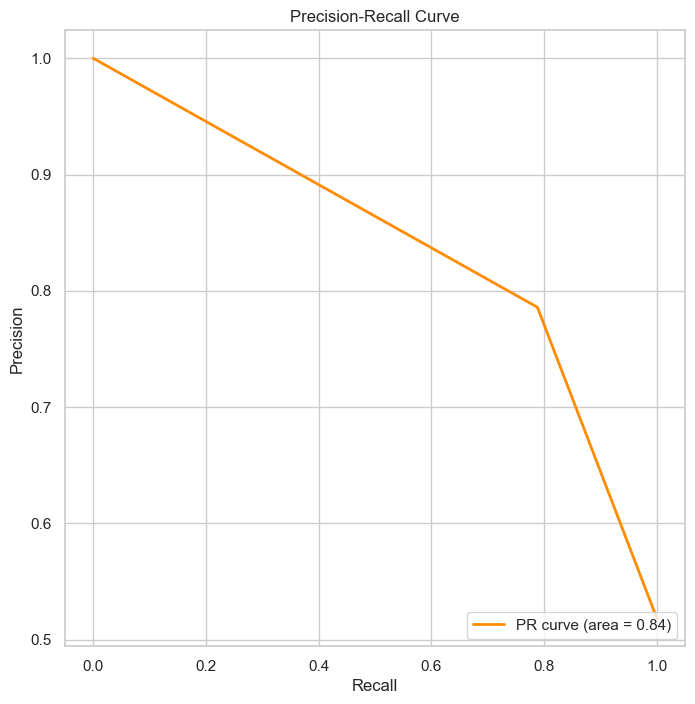

[512]
Precision: 0.8645719781981385
Recall: 0.29801324503311266
F1 Score: 0.44324303395394954
Weighted accuracy: 0.6119143055229539
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.95      0.70 1413.6493732849112
           1       0.86      0.30      0.44 1521.4751420454536

    accuracy                           0.61 2935.124515330365
   macro avg       0.71      0.62      0.57 2935.124515330365
weighted avg       0.72      0.61      0.57 2935.124515330365


Confusion Matrix:
 [[1342.6249351    71.02443818]
 [1068.05539773  453.41974432]]


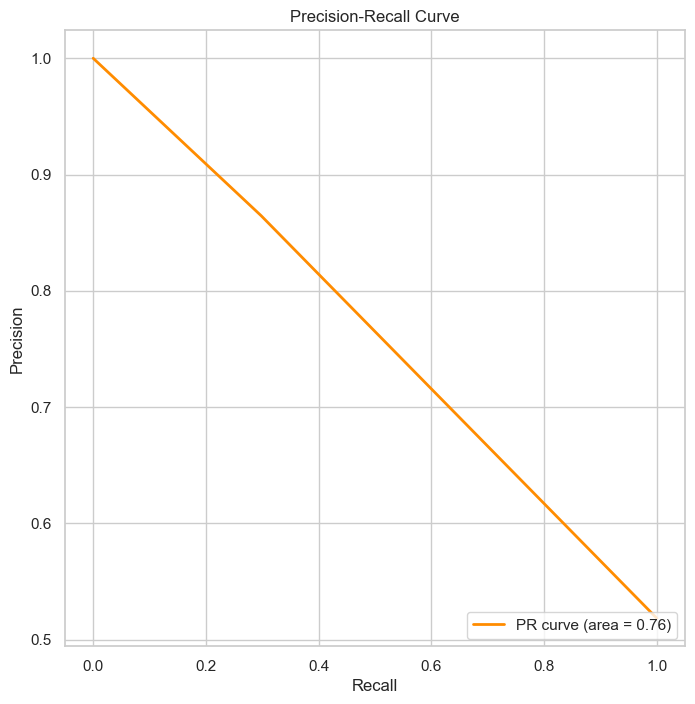

[64 64]
Precision: 0.5378508369755198
Recall: 0.9867549668874173
F1 Score: 0.6962153541399759
Weighted accuracy: 0.5536249920752884
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.09      0.16 1413.6493732849112
           1       0.54      0.99      0.70 1521.4751420454538

    accuracy                           0.55 2935.1245153303653
   macro avg       0.70      0.54      0.43 2935.1245153303653
weighted avg       0.69      0.55      0.44 2935.1245153303653


Confusion Matrix:
 [[ 123.63513313 1290.01424015]
 [  20.15198864 1501.32315341]]


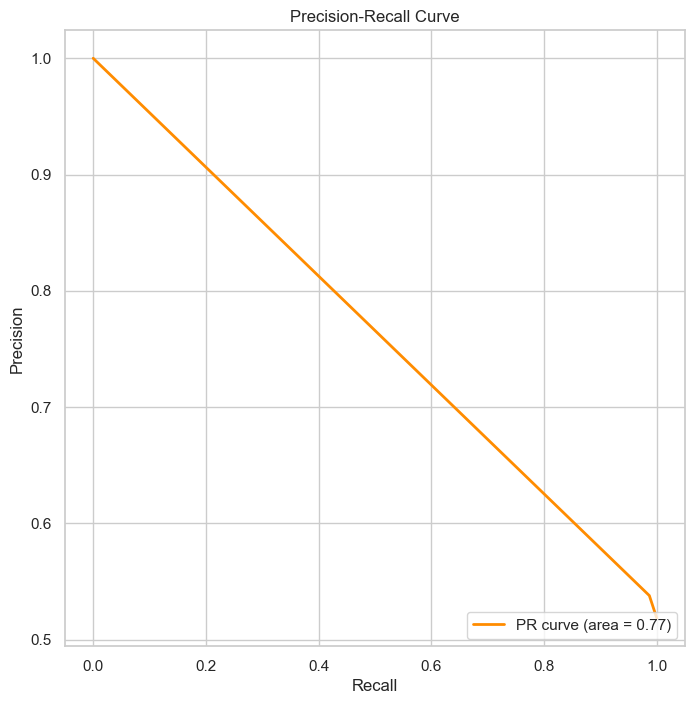

[128 128]
Precision: 0.8259392189553884
Recall: 0.5496688741721867
F1 Score: 0.6600616598375302
Weighted accuracy: 0.7065155371716489
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74 1413.6493732849112
           1       0.83      0.55      0.66 1521.4751420454538

    accuracy                           0.71 2935.1245153303653
   macro avg       0.73      0.71      0.70 2935.1245153303653
weighted avg       0.74      0.71      0.70 2935.1245153303653


Confusion Matrix:
 [[1237.40354521  176.24582808]
 [ 685.16761364  836.30752841]]


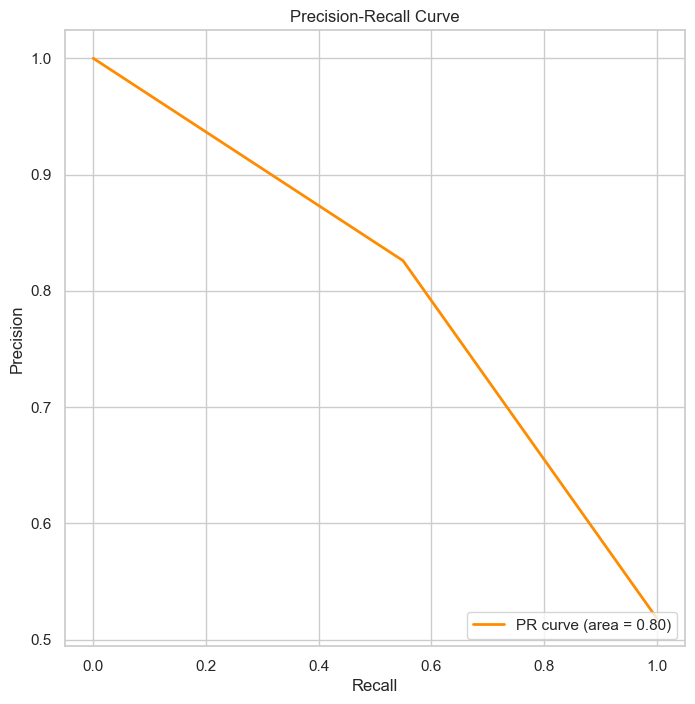

[256 256]
Precision: 0.8430071402073295
Recall: 0.3973509933774838
F1 Score: 0.5401177539225441
Weighted accuracy: 0.6492474630058952
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.92      0.72 1413.6493732849112
           1       0.84      0.40      0.54 1521.4751420454538

    accuracy                           0.65 2935.1245153303653
   macro avg       0.71      0.66      0.63 2935.1245153303653
weighted avg       0.72      0.65      0.63 2935.1245153303653


Confusion Matrix:
 [[1301.06248609  112.58688719]
 [ 916.91548295  604.55965909]]


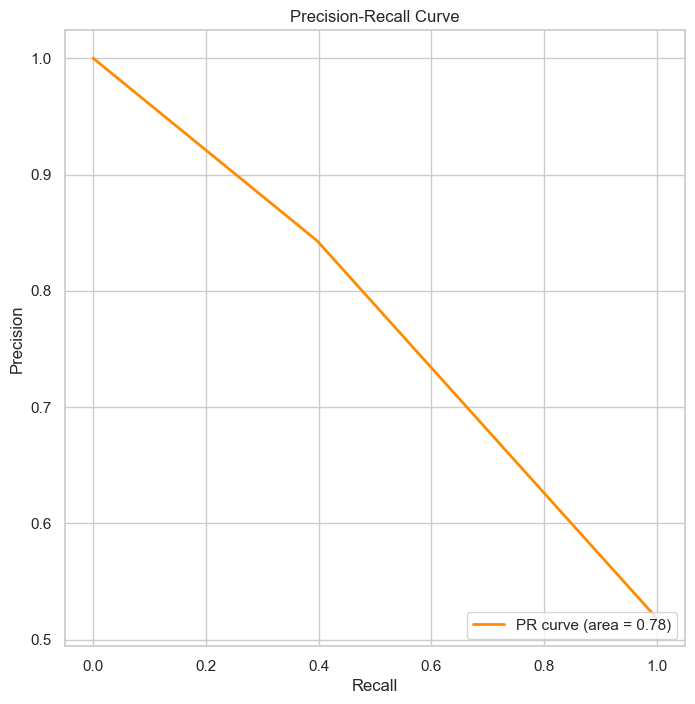

[512 512]
Precision: 0.8330758869542688
Recall: 0.5298013245033124
F1 Score: 0.6476954851246048
Weighted accuracy: 0.7012356969850312
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.89      0.74 1413.6493732849112
           1       0.83      0.53      0.65 1521.4751420454538

    accuracy                           0.70 2935.1245153303653
   macro avg       0.73      0.71      0.69 2935.1245153303653
weighted avg       0.74      0.70      0.69 2935.1245153303653


Confusion Matrix:
 [[1252.13453979  161.51483349]
 [ 715.39559659  806.07954545]]


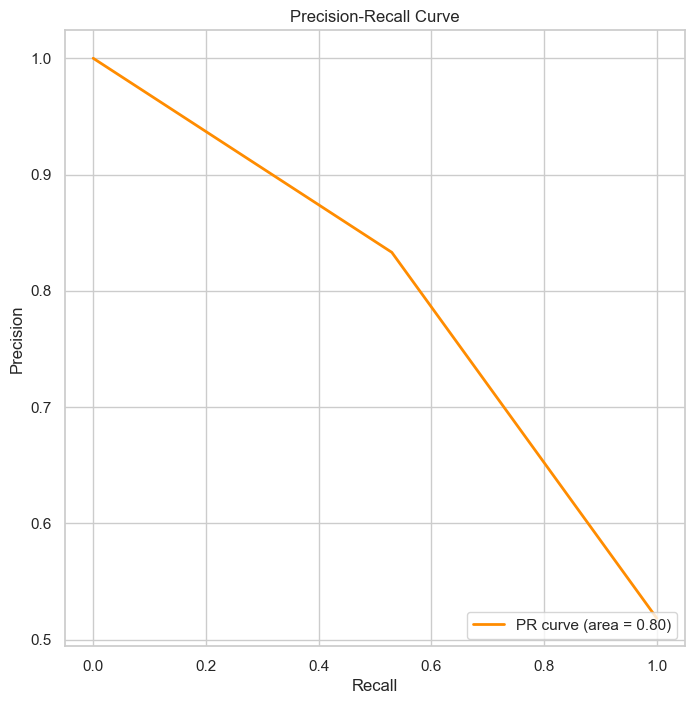

[64 64 64]
Precision: 0.7761721297839084
Recall: 0.7218543046357632
F1 Score: 0.7480284461600619
Weighted accuracy: 0.7479125191816841
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75 1413.6493732849112
           1       0.78      0.72      0.75 1521.4751420454538

    accuracy                           0.75 2935.1245153303653
   macro avg       0.75      0.75      0.75 2935.1245153303653
weighted avg       0.75      0.75      0.75 2935.1245153303653


Confusion Matrix:
 [[1096.93298969  316.71638359]
 [ 423.19176136 1098.28338068]]


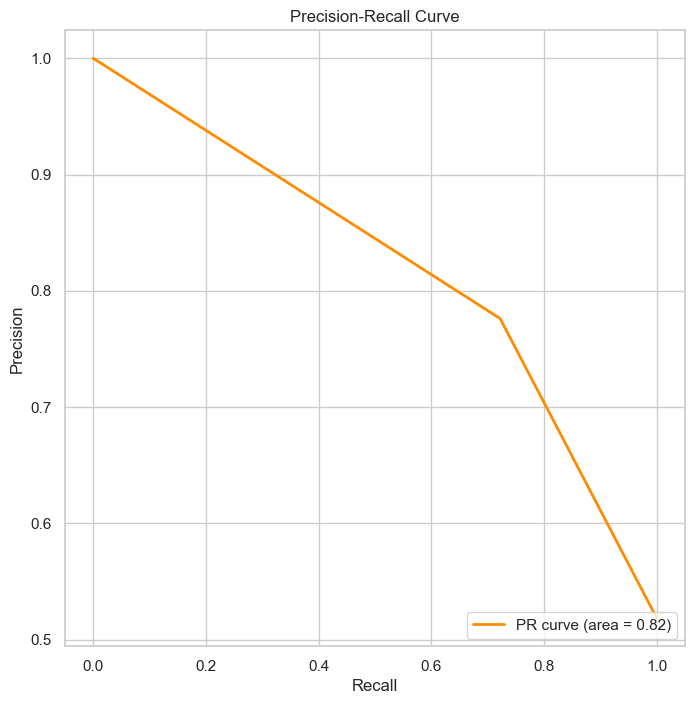

[128 128 128]
Precision: 0.7276963209498968
Recall: 0.03973509933774837
F1 Score: 0.07535549063086405
Weighted accuracy: 0.4945216915959444
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.98      0.65 1413.6493732849112
           1       0.73      0.04      0.08 1521.4751420454538

    accuracy                           0.49 2935.1245153303653
   macro avg       0.61      0.51      0.36 2935.1245153303653
weighted avg       0.61      0.49      0.35 2935.1245153303653


Confusion Matrix:
 [[1391.02677446   22.62259883]
 [1461.01917614   60.45596591]]


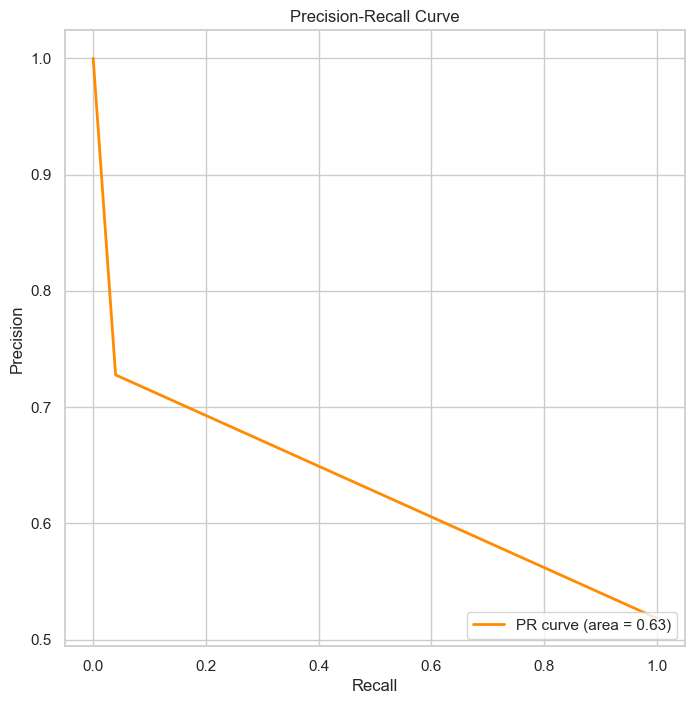

[256 256 256]
Precision: 0.3157685191690669
Recall: 0.013245033112582788
F1 Score: 0.025423660899689875
Weighted accuracy: 0.473620276704689
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.97      0.64 1413.6493732849112
           1       0.32      0.01      0.03 1521.4751420454538

    accuracy                           0.47 2935.1245153303653
   macro avg       0.40      0.49      0.33 2935.1245153303653
weighted avg       0.39      0.47      0.32 2935.1245153303653


Confusion Matrix:
 [[1369.98249648   43.66687681]
 [1501.32315341   20.15198864]]


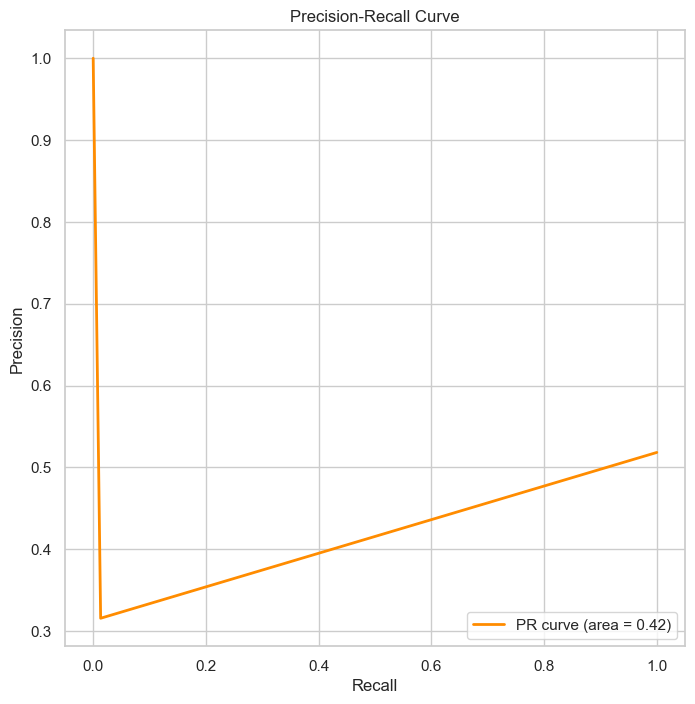

[512 512 512]
Precision: 0.5179200941575226
Recall: 0.9933774834437087
F1 Score: 0.6808588426056237
Weighted accuracy: 0.5172654618708165
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.00      0.01 1413.6493732849112
           1       0.52      0.99      0.68 1521.4751420454538

    accuracy                           0.52 2935.1245153303653
   macro avg       0.46      0.50      0.35 2935.1245153303653
weighted avg       0.46      0.52      0.36 2935.1245153303653


Confusion Matrix:
 [[   6.83939034 1406.80998294]
 [  10.07599432 1511.39914773]]


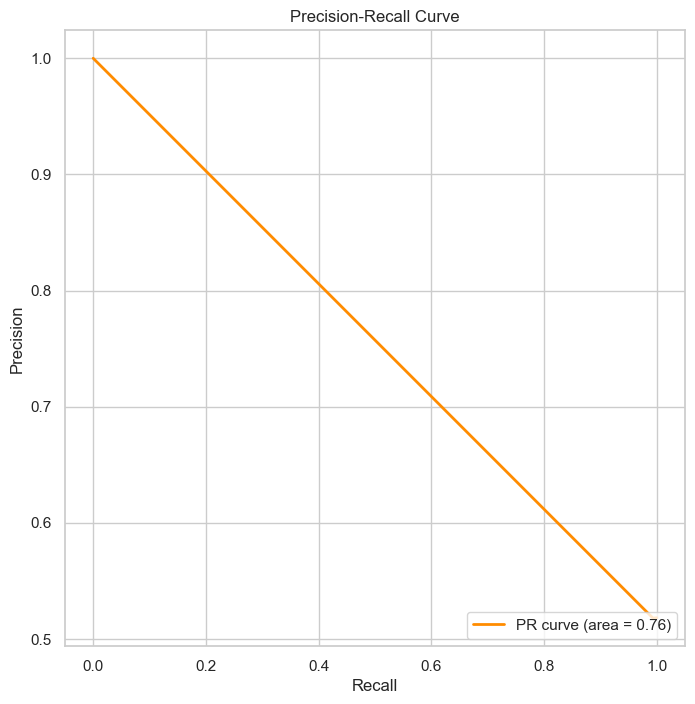

In [30]:
from sklearn.neural_network import MLPClassifier

X_tr, X_te, y_tr, y_te, w_tr, w_te = train_test_weight_data()
X_res, y_res = smote_sample(X_tr, y_tr)

tr_acc_grid = []
te_acc_grid = []

def do_MLP(hs, hl):
    mlp_shape = np.array([hs] * hl)
    print(mlp_shape)
    mlp = MLPClassifier(hidden_layer_sizes=mlp_shape, activation='relu', alpha=0.001, max_iter=200)

    mlp.fit(X_res, y_res)
    tr_acc = mlp.score(X_res, y_res)
    
    y_te_pred = mlp.predict(X_te)
    te_acc = weight_accuracy(y_te_pred, y_te, w_te)
    eval_model(y_te_pred, y_te, w_te)

    return tr_acc, te_acc


for hl in range(1, 4):
    tr_lst = []
    te_lst = []
    for hs in [64, 128, 256, 512]:
        tr_acc, te_acc = do_MLP(hs, hl)
        tr_lst.append(tr_acc)
        te_lst.append(te_acc)
    tr_acc_grid.append(tr_lst)
    te_acc_grid.append(te_lst)

[[0.65741941 0.79524824 0.79668396 0.62782512]
 [0.54390515 0.70975361 0.65987403 0.70276028]
 [0.78385513 0.53181734 0.51236569 0.50175991]]
[[0.63477163 0.78418599 0.77883588 0.61191431]
 [0.55362499 0.70651554 0.64924746 0.7012357 ]
 [0.74791252 0.49452169 0.47362028 0.51726546]]


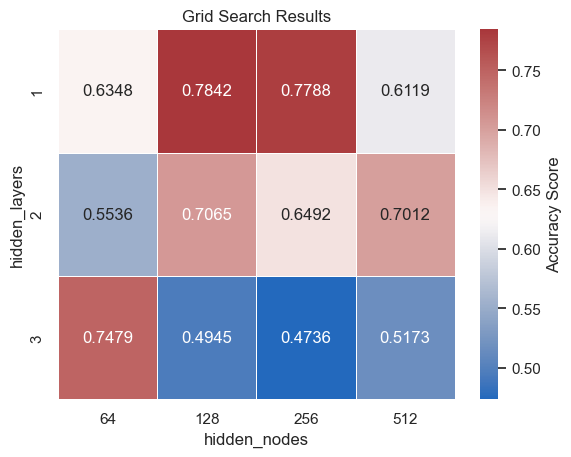

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

np_tr_acc_grid = np.array(tr_acc_grid)
np_te_acc_grid = np.array(te_acc_grid)

ax = sns.heatmap(np_te_acc_grid, linewidth=0.5, annot=True, cmap='vlag', fmt='.4f', cbar_kws={'label': 'Accuracy Score'})
plt.title('Grid Search Results')
plt.xlabel('hidden_nodes')
plt.ylabel('hidden_layers')

custom_xticks_positions = [0.5, 1.5, 2.5, 3.5]
custom_xticklabels = ['64', '128', '256', '512']
plt.xticks(custom_xticks_positions, custom_xticklabels)

custom_yticks_positions = [0.5, 1.5, 2.5]
custom_yticklabels = ['1', '2', '3']
plt.yticks(custom_yticks_positions, custom_yticklabels)


print(np_tr_acc_grid)
print(np_te_acc_grid)